# DS203 Project

# Sustainability and Utilisation of Energy Sources

## Exploratory Data Analysis & Data Visualization

### Data Cleaning and Preliminaries
<ol>
<li> Import the necessary libraries
<li> Read the data file into a data frame and display a portion of the data 
<li> Print the number of records and variables
<li> Print the datatype of each variable
<li> For each variable, print the number of unique values
<li> Identify redundant columns and drop them
<li> Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not nominal or ordinal), and continuous variables
<li> Identify countries with excessive null values and drop them
<li> Remove the rows with all NaN values
<li> Account for changes in world boundaries over 
<li> Scale data for energy to same units
<li> Rename columns for better readability
<li> Create new columns for total renewable and non-renewable energy production
<li> Scale data to per capita values for meaningful comparisons
<li> Cleaning of GDP and HDI data
</ol>

### Data Visualisation
#### In this section we will employ seaborn and geopandas to visualise data through plots
<ol> 
<li> Analyse correlation between important pairs of variables
<li> Identify countries with maximum and minimum per capita energy consumption, renewable usage and non renewable usage (Barplot)
<li> Classify countires by GDP for useful insights
<li> Stacked bar plots (Year 2020) for selected countries (100%/Non-scaled)
<li> Plot time-series data of different countries -  x-axis : Year, y-axis : Total/Renewable/non-renewable energy per capita
<li> Top producers (one for each country) - stacked line plot to show evolution of relative distributions
<li> Display energy production by source/fraction renewable(2020)/fraction non-renewable(2020)/total(2020) for all countries on the world map
fraction of total / per-capita / total - 3 options
<li> categorise countries by gdp
<li> correlation between gdp, hdi, (total energy consumption, renewable, non-renewable) through scatterplots pairwise with hue as gdp (category)
<li> renewable focussed analysis, usage distribution of top 5 consumers over recent years



<li> For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75th
percentile, and inter-quartile range.
<li> For each variable, plot box-and-whiskers plots.
<li> For each variable, plot the histogram three times: with too few bins, too many bins, good
number of bins.
<li> For each variable, use QQ-plot to see the extent to which the variable deviates from
normal distribution, and how (left-skew, right-skew, or more like uniform distribution)
<li> For each variable, check if the variable deviates is log-normal.
</ol>

Stacked bar with renewable and non renewable - for particular year
time series plot for particular country


### 1. Import the necessary libraries

In [232]:
import pandas as pd
import numpy as np

### 2. Read the data file into a data frame and display a portion of the data 

In [233]:
pd.set_option("display.max_rows",10, "display.max_columns", 20) # Setting the number of maximum rows and columns to display in the PANDAS library
df = pd.read_excel("data/bp-stats-review-2021-consolidated-dataset-panel-format.xlsx") # Importing the excel sheet
df

,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,...,ren_power_mtoe,ren_power_twh,renewables_ej,renewables_mtoe,solar_ej,solar_mtoe,solar_twh,wind_ej,wind_mtoe,wind_twh
0,Algeria,1965,12.550880,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,1966,12.902626,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,1967,13.275020,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Algeria,1968,13.663581,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Algeria,1969,14.061724,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6624,Zimbabwe,2016,14.030338,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6625,Zimbabwe,2017,14.236599,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626,Zimbabwe,2018,14.438812,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6627,Zimbabwe,2019,14.645473,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Print the number of records and variables

In [234]:
records, variables = df.shape
print(f"records = {records}, variables = {variables}")

records = 6629, variables = 95


### 4. Print the datatype of each variable

In [235]:
df.dtypes

Country             object
Year                 int64
pop                float64
ISO3166_alpha3      object
ISO3166_numeric    float64
                    ...   
solar_mtoe         float64
solar_twh          float64
wind_ej            float64
wind_mtoe          float64
wind_twh           float64
Length: 95, dtype: object

### 5. For each variable, print the number of unique values

In [236]:
pd.set_option("display.max_rows", 69)
pd.DataFrame(df.nunique())

,0
Country,123
Year,56
pop,6583
ISO3166_alpha3,107
ISO3166_numeric,107
...,...
solar_mtoe,1602
solar_twh,1401
wind_ej,1811
wind_mtoe,1810


### 6. Identify redundant columns and drop them

In [237]:
(df.columns)

Index(['Country', 'Year', 'pop', 'ISO3166_alpha3', 'ISO3166_numeric', 'Region',
       'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'biodiesel_cons_kbd',
       'biodiesel_cons_kboed', 'biodiesel_cons_ktoe', 'biodiesel_cons_pj',
       'biodiesel_prod_kbd', 'biodiesel_prod_kboed', 'biodiesel_prod_ktoe',
       'biodiesel_prod_pj', 'biofuels_cons_ej', 'biofuels_cons_kbd',
       'biofuels_cons_kboed', 'biofuels_cons_ktoe', 'biofuels_cons_mtoe',
       'biofuels_cons_pj', 'biofuels_prod_kbd', 'biofuels_prod_kboed',
       'biofuels_prod_ktoe', 'biofuels_prod_pj', 'biogeo_ej', 'biogeo_mtoe',
       'biogeo_twh', 'co2_mtco2', 'coalcons_ej', 'coalcons_mtoe',
       'coalprod_ej', 'coalprod_mt', 'coalprod_mtoe', 'cobalt_kt', 'elect_twh',
       'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil',
       'ethanol_cons_kbd', 'ethanol_cons_kboed', 'ethanol_cons_ktoe',
       'ethanol_cons_pj', 'ethanol_prod_kbd', 'ethanol_prod_kboed',
       'ethanol_prod_ktoe', 'ethanol_prod_pj', 'gascons_bc

One can observe that many columns represent the measurement of identical quantities in different units. Therefore, we will drop all columns that repeat this reading and only keep the measurements in one particular unit. 


In [238]:
['Country', # Country
'Year', # year of data measurement
'pop', # population
'Region',    # Geographical regions
'SubRegion', # Geographical subregions
'OPEC', 'EU', 'OECD', 'CIS'] # one-hot bit encoding for country member classes (i.e. OPEC member or non-member )
# all columns chosen

# biodiesel
['biodiesel_cons_kbd','biodiesel_cons_kboed', 'biodiesel_cons_ktoe', 'biodiesel_cons_pj',
'biodiesel_prod_kbd', 'biodiesel_prod_kboed', 'biodiesel_prod_ktoe',
'biodiesel_prod_pj']
# chosen column = 'biodiesel_prod_pj'

# biofuel
['biofuels_cons_ej', 'biofuels_cons_kbd',
'biofuels_cons_kboed', 'biofuels_cons_ktoe', 'biofuels_cons_mtoe',
'biofuels_cons_pj', 'biofuels_prod_kbd', 'biofuels_prod_kboed',
'biofuels_prod_ktoe', 'biofuels_prod_pj']
# chosen column = 'biofuels_prod_pj'

# geothermal, biomass and others
['biogeo_ej', 'biogeo_mtoe',
'biogeo_twh']
# chosen column = biogeo_ej

# co2
['co2_mtco2']

# coal
['coalcons_ej', 'coalcons_mtoe', 'coalprod_ej', 'coalprod_mt', 'coalprod_mtoe']
# chosen column = 'coalprod_ej'

# electricity
['elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil']
# chosen column = all

# ethanol
['ethanol_cons_kbd', 'ethanol_cons_kboed', 'ethanol_cons_ktoe','ethanol_cons_pj', 'ethanol_prod_kbd', 'ethanol_prod_kboed',
'ethanol_prod_ktoe', 'ethanol_prod_pj']
# chosen column = 'ethanol_prod_pj'

# gas
['gascons_bcfd', 'gascons_bcm', 'gascons_ej',
'gascons_mtoe', 'gasprod_bcfd', 'gasprod_bcm', 'gasprod_ej',
'gasprod_mtoe', 'gasreserves_tcm']
# chosen column = 'gasprod_ej'

# hydro
['hydro_ej','hydro_mtoe', 'hydro_twh']
# chosen column = 'hydro_ej'

# nuclear
['nuclear_ej', 'nuclear_mtoe', 'nuclear_twh']
# chosen column = 'nuclear_ej'

# oil
['oilcons_ej', 'oilcons_kbd', 'oilcons_mt', 'oilcons_mtoe', 'oilprod_crudecond_kbd', 'oilprod_kbd',
'oilprod_mt', 'oilprod_ngl_kbd', 'oilreserves_bbl']
#chosen column = 'oilcons_ej'

# primary energy
['primary_ej',
'primary_gj_pc', 'primary_mtoe']
# chosen column = 'primary_ej'

# renewables
['ren_power_ej', 'ren_power_mtoe', 'ren_power_twh',
'renewables_ej', 'renewables_mtoe']
#chosen column = 'ren_power_ej'

# solar
['solar_ej', 'solar_mtoe', 'solar_twh']
# chosen column = 'solar_ej'

# wind
['wind_ej', 'wind_mtoe', 'wind_twh']
# chosen column = 'wind_ej'

'''
The following columns will be dropped as they are not useful for our analysis
'''
['ISO3166_alpha3', 'ISO3166_numeric', # ISO 3166 codes - these have a 1-to-1 mapping with country
'cobalt_kt',   # cobalt production reserves
'graphite_kt', # graphite production reserves
'liqcons_kbd',   # Total Liquid fuel consumption
'lithium_kt',    # Lithium Production
'rareearths_kt', # rare earth material reserves
'refcap_kbd',    # oil refining capacity
'refthru_kbd']   # oil refinery throughput

chosen_columns = ['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS',
 'biodiesel_prod_pj', 'biofuels_prod_pj','biogeo_ej', 'co2_mtco2', 'coalprod_ej',
 'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil','ethanol_prod_pj',
 'gasprod_ej', 'hydro_ej','nuclear_ej','oilcons_ej','primary_ej','ren_power_ej','solar_ej','wind_ej']

Dropping the columns with more than 80% NaN values

In [239]:
filter1 = chosen_columns
percent_nulls = df.isnull().sum()*100/df.shape[0]
drop_columns = percent_nulls[percent_nulls > 80]
drop_columns = list(pd.DataFrame(drop_columns).index)
filter2 = drop_columns
filter = [i for i in filter1 if not i in filter2]
df[filter]

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00400,0.0,0.055459,0.089139,0.0,0.0,0.0
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00355,0.0,0.072982,0.107168,0.0,0.0,0.0
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00410,0.0,0.068191,0.101426,0.0,0.0,0.0
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00563,0.0,0.072602,0.108879,0.0,0.0,0.0
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00361,0.0,0.076701,0.120508,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6624,Zimbabwe,2016,14.030338,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6625,Zimbabwe,2017,14.236599,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626,Zimbabwe,2018,14.438812,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6627,Zimbabwe,2019,14.645473,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 7. Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not nominal or ordinal), and continuous variables

In [240]:
df[filter].columns

Index(['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD',
       'CIS', 'biogeo_ej', 'co2_mtco2', 'coalprod_ej', 'elect_twh',
       'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil', 'gasprod_ej',
       'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'ren_power_ej',
       'solar_ej', 'wind_ej'],
      dtype='object')

In [241]:
df[filter].dtypes

Country              object
Year                  int64
pop                 float64
Region               object
SubRegion            object
OPEC                float64
EU                  float64
OECD                float64
CIS                 float64
biogeo_ej           float64
co2_mtco2           float64
coalprod_ej         float64
elect_twh           float64
electbyfuel_coal    float64
electbyfuel_gas     float64
electbyfuel_oil     float64
gasprod_ej          float64
hydro_ej            float64
nuclear_ej          float64
oilcons_ej          float64
primary_ej          float64
ren_power_ej        float64
solar_ej            float64
wind_ej             float64
dtype: object

| Column | Type |
| ------- | ------ |
|'Country'       | Categorical |
'pop'           | Continous  
'Region'        | Categorical|    
'Year'          |Temporal  |
'SubRegion'     | Categorical | 
'EU'            | One-hot-bit encoding|  
'OPEC'          | One-hot-bit encoding | 
'OECD'          | One-hot-bit encoding | 
'CIS'           | One-hot-bit encoding | 
'biogeo_ej'     | Continuous | 
'co2_mtco2'     | Continuous | 
'coalprod_ej'   | Continuous |
'elect_twh'     | Continuous | 
'electbyfuel_coal'|Continuous |  
'electbyfuel_gas' | Continuous| 
'electbyfuel_oil | Continuous |
'gasprod_ej' | Continuous |
'hydro_ej' | Continuous |
'nuclear_ej' | Continuous | 
'oilcons_ej' | Continuous | 
'primary_ej | Continuous  |
'ren_power_ej' | Continuous | 
'solar_ej'| Continuous  |
'wind_ej' | Continuous  |

### 8. Identify countries with excessive null values and drop them

For example, let as look at the distribution of null values in the dataset for India

In [242]:
grp = df[filter].groupby('Country')
df_temp = grp.get_group("India")
df_temp.isnull().sum()/df_temp.shape[0]*100

Country              0.000000
Year                 0.000000
pop                  0.000000
Region               0.000000
SubRegion            0.000000
OPEC                 0.000000
EU                   0.000000
OECD                 0.000000
CIS                  0.000000
biogeo_ej            0.000000
co2_mtco2            0.000000
coalprod_ej         28.571429
elect_twh           35.714286
electbyfuel_coal    35.714286
electbyfuel_gas     35.714286
electbyfuel_oil     35.714286
gasprod_ej           8.928571
hydro_ej             0.000000
nuclear_ej           0.000000
oilcons_ej           0.000000
primary_ej           0.000000
ren_power_ej         0.000000
solar_ej             0.000000
wind_ej              0.000000
dtype: float64

We can see about 35% missing data in some categories which is due to the absence of readings from older years in the dataset. This problem is more pronounced for some other countries and it will be necessary to drop the energy sources that have excessive NaN values.

Create a list of countries from the dataframe

In [243]:
countries = df['Country'].unique()

The following columns contain energy/ emission measurements, these are the quantities which may potentially contain null values.

In [244]:
print(filter[9:])

['biogeo_ej', 'co2_mtco2', 'coalprod_ej', 'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil', 'gasprod_ej', 'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'ren_power_ej', 'solar_ej', 'wind_ej']


Create a new dataframe with percentage of null values for each country. We can intepret this data as the percentage of years for which data is absent for a given country and energy source. We can reasonably assume that data will be absent for older years but be available for recent years.

In [245]:
grp = df[filter].groupby('Country')
df_dict = {'Country':[]}
for column in filter[9:]:
    df_dict[column] = []

for country in countries:
    df_dict['Country'].append(country)
    for column in filter[9:]:
        df_temp = grp.get_group(country)[column]
        percent_nulls = df_temp.isnull().sum()/df_temp.shape[0]*100
        df_dict[column].append(percent_nulls)

df_percent_nulls = pd.DataFrame(df_dict)
df_percent_nulls.set_index('Country', inplace = True)
df_percent_nulls

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
Country,,,,,,,,,,,,,,,
Algeria,0.0,0.0,100.000000,35.714286,100.000000,100.000000,100.000000,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Argentina,0.0,0.0,100.000000,35.714286,35.714286,35.714286,35.714286,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,28.571429,35.714286,35.714286,35.714286,35.714286,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,100.000000,35.714286,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,28.571429,35.714286,100.000000,100.000000,100.000000,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vietnam,0.0,0.0,28.571429,35.714286,35.714286,35.714286,35.714286,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,8.928571,100.0,100.0,100.0,100.0,100.0,100.0,100.0


We can sum over all columns and identify countries which have a large amount of missing data overall

In [246]:
pd.set_option("display.max_rows", None)
country_nulls = pd.DataFrame(df_percent_nulls.mean(axis = 1))


Using this dataframe we will obtain a list of countries with percentage of null values greater than a threshold (90%)

In [247]:
threshold = 90
countries_to_drop = list(country_nulls[country_nulls[0] > threshold].index)
print(countries_to_drop)

['Angola', 'Bahrain', 'Bolivia', 'Brunei', 'Chad', 'Cuba', 'Curacao', 'Democratic Republic of Congo', 'Equatorial Guinea', 'Gabon', 'Libya', 'Madagascar', 'Mongolia', 'Mozambique', 'Myanmar', 'Netherlands Antilles', 'New Caledonia', 'Nigeria', 'Papua New Guinea', 'Republic of Congo', 'Serbia', 'South Sudan', 'Sudan', 'Syria', 'Tunisia', 'Yemen', 'Zambia', 'Zimbabwe']


Now we display the dataframe for columns of interest and the countries with greater than 90% null values dropped

In [248]:
pd.set_option("display.max_rows", 20)
country_drop_filter = (df['Country'].isin(countries_to_drop))
df[filter][~country_drop_filter]

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004000,0.0,0.055459,0.089139,0.000000,0.000000,0.000000
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003550,0.0,0.072982,0.107168,0.000000,0.000000,0.000000
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004100,0.0,0.068191,0.101426,0.000000,0.000000,0.000000
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.005630,0.0,0.072602,0.108879,0.000000,0.000000,0.000000
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003610,0.0,0.076701,0.120508,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,Vietnam,2016,93.640435,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000616,...,44.781341,0.699708,0.368591,0.597945,0.0,0.930773,3.088531,0.002575,0.000060,0.001899
6503,Vietnam,2017,94.600643,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000688,...,39.482076,0.456004,0.342745,0.798859,0.0,0.974318,3.306803,0.003187,0.000084,0.002415
6504,Vietnam,2018,95.545959,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000684,...,40.082240,0.212300,0.347747,0.755921,0.0,1.037096,3.727491,0.004475,0.001015,0.002776
6505,Vietnam,2019,96.462108,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000004,...,42.488079,1.394456,0.354695,0.603704,0.0,1.103961,4.166350,0.036710,0.036702,0.000004


Now we can also view the df_percent_nulls dataframe after dropping the countries obtained above

In [249]:
percent_nulls_country_drop_filter = df_percent_nulls.index.isin(countries_to_drop)
df_percent_nulls[~percent_nulls_country_drop_filter]

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
Country,,,,,,,,,,,,,,,
Algeria,0.000000,0.000000,100.000000,35.714286,100.000000,100.000000,100.000000,8.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Argentina,0.000000,0.000000,100.000000,35.714286,35.714286,35.714286,35.714286,8.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,0.000000,0.000000,28.571429,35.714286,35.714286,35.714286,35.714286,8.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Austria,0.000000,0.000000,100.000000,35.714286,100.000000,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Azerbaijan,35.714286,35.714286,100.000000,35.714286,100.000000,100.000000,100.000000,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,0.000000,0.000000,100.000000,35.714286,35.714286,35.714286,35.714286,8.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
United Kingdom,0.000000,0.000000,28.571429,35.714286,35.714286,35.714286,35.714286,8.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Uzbekistan,35.714286,35.714286,35.714286,35.714286,100.000000,100.000000,100.000000,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286


Now we will identify columns which have more than 90% NaN values for a large number of countries. We obtain that none of the columns can be dropped since there is significant amount of data in each.

In [250]:
threshold = 90
for column in df_percent_nulls.columns:
    filt = df_percent_nulls[~percent_nulls_country_drop_filter][column] > threshold
    percent_countries_with_high_nulls = np.sum(filt)/df_percent_nulls.shape[0]*100
    print(column + ":", percent_countries_with_high_nulls)

biogeo_ej: 0.0
co2_mtco2: 0.0
coalprod_ej: 43.08943089430895
elect_twh: 0.8130081300813009
electbyfuel_coal: 43.90243902439025
electbyfuel_gas: 43.90243902439025
electbyfuel_oil: 43.90243902439025
gasprod_ej: 34.146341463414636
hydro_ej: 0.0
nuclear_ej: 0.0
oilcons_ej: 0.0
primary_ej: 0.0
ren_power_ej: 0.0
solar_ej: 0.0
wind_ej: 0.0


### 9. Remove rows with all NaN values

Whenever a country has missing data is missing in the past upto a certain date and then available uptil 2020. Country-year pairs serve as natural keys for our data. Thus, dropping rows with all NaNs is equivalent to removing rows with missing past data for each country.

In [251]:
df_filter = df[filter[9:]][~country_drop_filter]
mask = df_filter.isna().sum(axis=1) == df_filter.shape[1]
df_final =  df[filter][(~country_drop_filter) & (~mask)]
df_final

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004000,0.0,0.055459,0.089139,0.000000,0.000000,0.000000
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003550,0.0,0.072982,0.107168,0.000000,0.000000,0.000000
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004100,0.0,0.068191,0.101426,0.000000,0.000000,0.000000
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.005630,0.0,0.072602,0.108879,0.000000,0.000000,0.000000
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003610,0.0,0.076701,0.120508,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,Vietnam,2016,93.640435,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000616,...,44.781341,0.699708,0.368591,0.597945,0.0,0.930773,3.088531,0.002575,0.000060,0.001899
6503,Vietnam,2017,94.600643,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000688,...,39.482076,0.456004,0.342745,0.798859,0.0,0.974318,3.306803,0.003187,0.000084,0.002415
6504,Vietnam,2018,95.545959,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000684,...,40.082240,0.212300,0.347747,0.755921,0.0,1.037096,3.727491,0.004475,0.001015,0.002776
6505,Vietnam,2019,96.462108,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000004,...,42.488079,1.394456,0.354695,0.603704,0.0,1.103961,4.166350,0.036710,0.036702,0.000004


Now we have obtained our final dataframe where we have dropped all columns which have excessive missing data and also dropped the rows with all missing values. For remaining analysis we will use this filtered data.

### 10. Account for changes in world boundaries over time

USSR split to Russian Federation along with several smaller countries. For simplicity we can assume that the past production of USSR represent the values for Russian Federation as well

In [252]:
df_final[df_final['Country'] == 'USSR']

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
6115,USSR,1965,230.218378,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.81434,0.018606,7.181458,24.847812,0.0,0.0,0.0
6116,USSR,1966,232.931747,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.91823,0.020639,7.690491,26.422695,0.0,0.0,0.0
6117,USSR,1967,235.428251,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.88571,0.022539,8.379157,27.773929,0.0,0.0,0.0
6118,USSR,1968,237.762971,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.04040,0.031334,8.932018,28.805019,0.0,0.0,0.0
6119,USSR,1969,240.016838,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.15181,0.036327,9.498164,30.072811,0.0,0.0,0.0
6120,USSR,1970,242.251443,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,6.750050,1.24377,0.043885,10.455989,31.634512,0.0,0.0,0.0
6121,USSR,1971,244.487290,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,7.242975,1.26099,0.053872,11.085012,33.189959,0.0,0.0,0.0
6122,USSR,1972,246.716701,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,7.549880,1.22899,0.098332,12.022780,34.899019,0.0,0.0,0.0
6123,USSR,1973,248.939799,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,8.057980,1.22345,0.143100,12.925434,36.674066,0.0,0.0,0.0
6124,USSR,1974,251.148561,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,8.886625,1.32030,0.214606,14.199014,38.698839,0.0,0.0,0.0


In [253]:
df_final[df_final['Country'] == 'Russian Federation']

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
4079,Russian Federation,1985,142.957289,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,451.267182,113.337054,15.295724,1.597260,0.993172,10.570622,34.274092,0.000000,0.000000,0.000000
4080,Russian Federation,1986,143.995348,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,469.813711,117.995068,16.652416,1.643310,1.052215,10.696893,34.879392,0.000000,0.000000,0.000000
4081,Russian Federation,1987,145.032886,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,487.931242,122.545338,18.019702,1.625279,1.247022,10.784362,36.021774,0.000000,0.000000,0.000000
4082,Russian Federation,1988,146.013482,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,494.153498,124.108076,19.526034,1.609236,1.348138,10.699243,36.652206,0.000000,0.000000,0.000000
4083,Russian Federation,1989,146.863927,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,501.005068,125.828868,20.386795,1.597260,1.363385,10.898841,36.788617,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,Russian Federation,2016,145.275374,CIS,CIS,0.0,0.0,0.0,1.0,0.004037,...,521.809361,10.968449,21.213913,1.671337,1.780000,6.480802,28.823165,0.009617,0.004240,0.001341
4111,Russian Federation,2017,145.530091,CIS,CIS,0.0,0.0,0.0,1.0,0.004673,...,516.274203,6.946062,22.880191,1.666467,1.828269,6.457907,28.999904,0.010820,0.004896,0.001251
4112,Russian Federation,2018,145.734034,CIS,CIS,0.0,0.0,0.0,1.0,0.004512,...,523.722464,7.948117,24.088067,1.705704,1.830462,6.562507,30.105569,0.012221,0.005587,0.002122
4113,Russian Federation,2019,145.872260,CIS,CIS,0.0,0.0,0.0,1.0,0.004646,...,519.208661,12.011549,24.445614,1.732743,1.862978,6.716215,29.895868,0.016233,0.008781,0.002806


USSR data ends at 1984 while Russian Federation data starts at 1985. Before we merge the two countries we observe a sharp fall in population after the split of USSR. If the per capita values have not changed significantly we can merge the two countries for analysis. Therefore, let us look at per capita values

In [254]:
df_final[df_final['Country'] == 'USSR']

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
6115,USSR,1965,230.218378,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.81434,0.018606,7.181458,24.847812,0.0,0.0,0.0
6116,USSR,1966,232.931747,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.91823,0.020639,7.690491,26.422695,0.0,0.0,0.0
6117,USSR,1967,235.428251,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.88571,0.022539,8.379157,27.773929,0.0,0.0,0.0
6118,USSR,1968,237.762971,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.04040,0.031334,8.932018,28.805019,0.0,0.0,0.0
6119,USSR,1969,240.016838,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.15181,0.036327,9.498164,30.072811,0.0,0.0,0.0
6120,USSR,1970,242.251443,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,6.750050,1.24377,0.043885,10.455989,31.634512,0.0,0.0,0.0
6121,USSR,1971,244.487290,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,7.242975,1.26099,0.053872,11.085012,33.189959,0.0,0.0,0.0
6122,USSR,1972,246.716701,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,7.549880,1.22899,0.098332,12.022780,34.899019,0.0,0.0,0.0
6123,USSR,1973,248.939799,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,8.057980,1.22345,0.143100,12.925434,36.674066,0.0,0.0,0.0
6124,USSR,1974,251.148561,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,8.886625,1.32030,0.214606,14.199014,38.698839,0.0,0.0,0.0


In [255]:
df_ussr = df_final[df_final['Country'] == 'USSR'].copy()
for column in filter[9:]:
       df_ussr[column] = (df_final[df_final['Country'] == 'USSR'][column]/df_final[df_final['Country'] == 'USSR']["pop"])

In [256]:
pd.set_option("display.max_rows", 10)
df_ussr

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
6115,USSR,1965,230.218378,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.003537,0.000081,0.031194,0.107931,0.0,0.0,0.0
6116,USSR,1966,232.931747,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.003942,0.000089,0.033016,0.113435,0.0,0.0,0.0
6117,USSR,1967,235.428251,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.003762,0.000096,0.035591,0.117972,0.0,0.0,0.0
6118,USSR,1968,237.762971,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.004376,0.000132,0.037567,0.121150,0.0,0.0,0.0
6119,USSR,1969,240.016838,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.004799,0.000151,0.039573,0.125295,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,USSR,1980,264.383008,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.056133,0.006957,0.002796,0.068106,0.182657,0.0,0.0,0.0
6131,USSR,1981,266.707685,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.059492,0.007002,0.003265,0.068101,0.184916,0.0,0.0,0.0
6132,USSR,1982,269.060566,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.063459,0.006492,0.003726,0.067013,0.187893,0.0,0.0,0.0
6133,USSR,1983,271.450925,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.067297,0.006644,0.004104,0.065453,0.190153,0.0,0.0,0.0


In [257]:
df_russia = df_final[df_final['Country'] == 'Russian Federation'].copy()
for column in filter[9:]:
       df_russia[column] = (df_final[df_final['Country'] == 'Russian Federation'][column]/df_final[df_final['Country'] == 'Russian Federation']["pop"])

In [258]:
df_russia

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
4079,Russian Federation,1985,142.957289,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,3.156657,0.792804,0.106995,0.011173,0.006947,0.073943,0.239751,0.000000,0.000000,0.000000
4080,Russian Federation,1986,143.995348,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,3.262701,0.819437,0.115646,0.011412,0.007307,0.074286,0.242226,0.000000,0.000000,0.000000
4081,Russian Federation,1987,145.032886,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,3.364280,0.844949,0.124246,0.011206,0.008598,0.074358,0.248370,0.000000,0.000000,0.000000
4082,Russian Federation,1988,146.013482,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,3.384300,0.849977,0.133728,0.011021,0.009233,0.073276,0.251019,0.000000,0.000000,0.000000
4083,Russian Federation,1989,146.863927,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,3.411356,0.856772,0.138814,0.010876,0.009283,0.074210,0.250495,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,Russian Federation,2016,145.275374,CIS,CIS,0.0,0.0,0.0,1.0,0.000028,...,3.591864,0.075501,0.146026,0.011505,0.012253,0.044610,0.198404,0.000066,0.000029,0.000009
4111,Russian Federation,2017,145.530091,CIS,CIS,0.0,0.0,0.0,1.0,0.000032,...,3.547543,0.047729,0.157220,0.011451,0.012563,0.044375,0.199271,0.000074,0.000034,0.000009
4112,Russian Federation,2018,145.734034,CIS,CIS,0.0,0.0,0.0,1.0,0.000031,...,3.593687,0.054539,0.165288,0.011704,0.012560,0.045031,0.206579,0.000084,0.000038,0.000015
4113,Russian Federation,2019,145.872260,CIS,CIS,0.0,0.0,0.0,1.0,0.000032,...,3.559338,0.082343,0.167582,0.011878,0.012771,0.046042,0.204946,0.000111,0.000060,0.000019


In [259]:
df_ussr[df_ussr['Year']==1984][filter[9:]]

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
6134,0.0,12.801449,0.052756,NaN,NaN,NaN,NaN,0.073134,0.007411,0.00525,0.064879,0.195522,0.0,0.0,0.0


In [260]:
df_russia[df_russia['Year']==1985][filter[9:]]

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
4079,0.0,15.196137,0.054417,6.729283,0.96779,3.156657,0.792804,0.106995,0.011173,0.006947,0.073943,0.239751,0.0,0.0,0.0


We can see a significant jump in per capita values from USSR in 1984 to Russian Federation in 1985. Thus, we can not merge the two countries and must analyse them separately.

Looking at the list of countries we also notice 'China' and 'China Honk Kong SAR' listed separately. Let us compare their data and see how to handle it.

In [261]:
df_final['Country'].unique()

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'China Hong Kong SAR', 'Colombia', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', 'Oman',
       'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russian Federation', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Total Africa', 'Total Asia Pacific', 'Total CIS',
       'Total Central America', '

In [262]:
df_final[df_final['Country']=='China'][filter[9:]]

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
941,0.000000,488.525419,NaN,NaN,NaN,NaN,NaN,NaN,0.220970,0.000000,0.464625,5.516043,0.000000,0.000000,0.000000
942,0.000000,530.349045,NaN,NaN,NaN,NaN,NaN,NaN,0.224859,0.000000,0.596880,5.995001,0.000000,0.000000,0.000000
943,0.000000,475.920674,NaN,NaN,NaN,NaN,NaN,NaN,0.193835,0.000000,0.589294,5.391341,0.000000,0.000000,0.000000
944,0.000000,476.682790,NaN,NaN,NaN,NaN,NaN,NaN,0.228704,0.000000,0.644524,5.445350,0.000000,0.000000,0.000000
945,0.000000,582.473700,NaN,NaN,NaN,NaN,NaN,NaN,0.232593,0.000000,0.864160,6.627664,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,0.562522,9278.978313,70.816435,6133.160,4156.350123,188.280200,10.367000,4.965898,10.440824,1.929959,25.062933,128.631528,3.345388,0.602294,2.180571
993,0.716377,9466.360373,73.173994,6604.447,4430.029738,203.200000,9.868982,5.371181,10.485585,2.232900,26.202555,132.804467,4.517977,1.060200,2.741400
994,0.838581,9652.687227,76.870620,7166.133,4763.245667,215.500000,10.750364,5.811079,10.726884,2.639474,27.064349,137.576579,5.694318,1.582789,3.272947
995,1.004863,9810.456419,79.755979,7503.428,4849.697651,232.500000,10.750364,6.392154,11.343886,3.108444,27.935037,142.028730,6.614682,1.996821,3.612998


In [263]:
df_final[df_final['Country']=='China Hong Kong SAR'][filter[9:]]

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
997,0.000000,7.134408,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.089537,0.094687,0.000000,0.000000,0.000000
998,0.000000,7.697027,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.098255,0.102693,0.000000,0.000000,0.000000
999,0.000000,9.074427,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.117735,0.121294,0.000000,0.000000,0.000000
1000,0.000000,9.781402,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.128587,0.131141,0.000000,0.000000,0.000000
1001,0.000000,11.469610,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.152573,0.154080,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.000588,92.704244,NaN,38.221444,NaN,NaN,NaN,NaN,0.0,0.0,0.812440,1.206175,0.000602,0.000009,0.000004
1049,0.000585,98.925738,NaN,36.984166,NaN,NaN,NaN,NaN,0.0,0.0,0.917589,1.293332,0.000602,0.000008,0.000009
1050,0.000601,99.501323,NaN,36.528429,NaN,NaN,NaN,NaN,0.0,0.0,0.929641,1.301775,0.000617,0.000010,0.000006
1051,0.000661,94.684744,NaN,36.870858,NaN,NaN,NaN,NaN,0.0,0.0,0.869359,1.240800,0.000676,0.000009,0.000006


We are uncertain is data for Hong Kong has been accounted for in the data for China

### 11. Scale data for energy to same units (to Exajoule)

Conversion facor : 1 TWh = 0.0036 Exajoules  
Columns for electricity (total and by fossil fuel sources) are measured in TWh (TerraWatt-hours). Only these columns need scaling. All other data is already measured in Exajoules.

In [264]:
df_final[filter[12:16]] = df_final[filter[12:16]]*.0036
df_final

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004000,0.0,0.055459,0.089139,0.000000,0.000000,0.000000
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003550,0.0,0.072982,0.107168,0.000000,0.000000,0.000000
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004100,0.0,0.068191,0.101426,0.000000,0.000000,0.000000
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.005630,0.0,0.072602,0.108879,0.000000,0.000000,0.000000
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003610,0.0,0.076701,0.120508,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,Vietnam,2016,93.640435,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000616,...,0.161213,0.002519,0.368591,0.597945,0.0,0.930773,3.088531,0.002575,0.000060,0.001899
6503,Vietnam,2017,94.600643,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000688,...,0.142135,0.001642,0.342745,0.798859,0.0,0.974318,3.306803,0.003187,0.000084,0.002415
6504,Vietnam,2018,95.545959,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000684,...,0.144296,0.000764,0.347747,0.755921,0.0,1.037096,3.727491,0.004475,0.001015,0.002776
6505,Vietnam,2019,96.462108,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000004,...,0.152957,0.005020,0.354695,0.603704,0.0,1.103961,4.166350,0.036710,0.036702,0.000004


Since we are only interested in total electricity generated by all fossil-fuel sources and non-fossil-fuel sources (i.e. we do not care about whether the electricity came from coal or natural gas for our analysis) we will add the electricity by fuel columns and drop the original ones. We will also add a new column for electricity generated by non-fossil fuels.

In [265]:
pd.set_option("display.max_columns", None)
df_final['elec_gen_fossil'] = (df_final["electbyfuel_coal"]) + (df_final["electbyfuel_gas"]) + (df_final["electbyfuel_oil"])
df_final['elec_gen_non_fossil'] = df_final['elect_twh'] - df_final['elec_gen_fossil']
df_final.drop(filter[13:16], axis = 1, inplace = True)

Rearranging columns so that electricty by fossil and non-fossil fuel sources appears alongside total electricty

In [266]:
columns = list(df_final.columns)
columns = columns[0:13]+columns[21:]+columns[13:21]
df_final = df_final[columns]
print(columns)

['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'biogeo_ej', 'co2_mtco2', 'coalprod_ej', 'elect_twh', 'elec_gen_fossil', 'elec_gen_non_fossil', 'gasprod_ej', 'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'ren_power_ej', 'solar_ej', 'wind_ej']


### 12. Rename columns for better readability

In [267]:
new_columns = ['Country','Year','Population','Region','Sub Region', 'OPEC', 'EU', 'OECD', 'CIS', 'Geothermal and Biomass','CO2 (in million tonnes)', 
               'Coal', 'Total Electricity',
       'Electricity from Fossil Fuels', 'Electricity from Non-Fossil Fuels', 'Natural Gas', 'Hydroelectricity',
       'Nuclear', 'Oil', 'Total Primary Energy Consumption', 'Total Renewable Energy', 'Solar',
       'Wind']

df_final.columns = new_columns

### 13. Create new columns for total renewable and non-renewable energy production

Our data already has a column for total renewable energy, we only need to add a column for total non-renewable energy. <br>
We can find the approximate non-renewable energy as sum of oil, coal, natural gas and nuclear. While computing the sum we have assumed NaN's to be zero. This way total non-renewable power only indicates the sum of renewable power for sources that are known.

In [268]:
df_final['Total Non-Renewable Energy'] = df_final.fillna(0)['Coal'] + df_final.fillna(0)['Natural Gas'] + df_final.fillna(0)['Oil'] + df_final.fillna(0)['Nuclear']

C:\Users\Pranava\AppData\Local\Temp/ipykernel_16660/2342284038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Total Non-Renewable Energy'] = df_final.fillna(0)['Coal'] + df_final.fillna(0)['Natural Gas'] + df_final.fillna(0)['Oil'] + df_final.fillna(0)['Nuclear']


For example, consider the following subset of data

In [269]:
df_final[['Country','Year','Coal','Natural Gas', 'Oil', 'Nuclear','Total Non-Renewable Energy']].head(120).tail(10)


,Country,Year,Coal,Natural Gas,Oil,Nuclear,Total Non-Renewable Energy
166,Argentina,2019,NaN,1.498169,1.147720,0.075264,2.721154
167,Argentina,2020,NaN,1.378497,1.034800,0.094700,2.507996
168,Australia,1965,NaN,NaN,0.720070,0.000000,0.720070
169,Australia,1966,NaN,NaN,0.770571,0.000000,0.770571
170,Australia,1967,NaN,NaN,0.843796,0.000000,0.843796
171,Australia,1968,NaN,NaN,0.919026,0.000000,0.919026
172,Australia,1969,NaN,NaN,0.944813,0.000000,0.944813
173,Australia,1970,NaN,0.062294,1.044704,0.000000,1.106998
174,Australia,1971,NaN,0.092976,1.099960,0.000000,1.192936
175,Australia,1972,NaN,0.133467,1.119720,0.000000,1.253187


Let us rearrange the columns again in a more logical manner

In [270]:
new_columns = ['Country', 'Year', 'Population', 'Region', 'Sub Region', 'OPEC', 'EU', 'OECD', 'CIS', 
 'CO2 (in million tonnes)',
 'Total Primary Energy Consumption','Total Renewable Energy','Total Non-Renewable Energy', 
 'Total Electricity', 'Electricity from Fossil Fuels', 'Electricity from Non-Fossil Fuels',
 'Coal', 'Natural Gas', 'Oil', 'Nuclear', 
 'Hydroelectricity', 'Solar', 'Wind','Geothermal and Biomass']
 
df_final = df_final[new_columns]
df_final


,Country,Year,Population,Region,Sub Region,OPEC,EU,OECD,CIS,CO2 (in million tonnes),Total Primary Energy Consumption,Total Renewable Energy,Total Non-Renewable Energy,Total Electricity,Electricity from Fossil Fuels,Electricity from Non-Fossil Fuels,Coal,Natural Gas,Oil,Nuclear,Hydroelectricity,Solar,Wind,Geothermal and Biomass
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,5.568753,0.089139,0.000000,0.055459,NaN,NaN,NaN,NaN,NaN,0.055459,0.0,0.004000,0.000000,0.000000,0.000000
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,6.867506,0.107168,0.000000,0.072982,NaN,NaN,NaN,NaN,NaN,0.072982,0.0,0.003550,0.000000,0.000000,0.000000
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,6.369307,0.101426,0.000000,0.068191,NaN,NaN,NaN,NaN,NaN,0.068191,0.0,0.004100,0.000000,0.000000,0.000000
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,6.771137,0.108879,0.000000,0.072602,NaN,NaN,NaN,NaN,NaN,0.072602,0.0,0.005630,0.000000,0.000000,0.000000
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,7.592118,0.120508,0.000000,0.076701,NaN,NaN,NaN,NaN,NaN,0.076701,0.0,0.003610,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,Vietnam,2016,93.640435,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,198.082509,3.088531,0.002575,2.207539,0.632682,0.393887,0.238795,0.908175,0.368591,0.930773,0.0,0.597945,0.000060,0.001899,0.000616
6503,Vietnam,2017,94.600643,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,199.489386,3.306803,0.003187,2.217594,0.689735,0.368916,0.320818,0.900531,0.342745,0.974318,0.0,0.798859,0.000084,0.002415,0.000688
6504,Vietnam,2018,95.545959,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,240.981486,3.727491,0.004475,2.378572,0.753052,0.447104,0.305948,0.993729,0.347747,1.037096,0.0,0.755921,0.001015,0.002776,0.000684
6505,Vietnam,2019,96.462108,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,292.073219,4.166350,0.036710,2.546239,0.818860,0.556914,0.261945,1.087582,0.354695,1.103961,0.0,0.603704,0.036702,0.000004,0.000004


### 14. Scale data to per capita values for meaningful comparisons


In [271]:
new_columns = list(df_final.columns)

df_per_capita = df_final.copy()
for column in new_columns[9:]:
    df_per_capita[column] = (df_final[column]/df_final["Population"])

df_per_capita

,Country,Year,Population,Region,Sub Region,OPEC,EU,OECD,CIS,CO2 (in million tonnes),Total Primary Energy Consumption,Total Renewable Energy,Total Non-Renewable Energy,Total Electricity,Electricity from Fossil Fuels,Electricity from Non-Fossil Fuels,Coal,Natural Gas,Oil,Nuclear,Hydroelectricity,Solar,Wind,Geothermal and Biomass
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.443694,0.007102,0.000000,0.004419,NaN,NaN,NaN,NaN,NaN,0.004419,0.0,0.000319,0.000000e+00,0.000000e+00,0.000000e+00
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.532256,0.008306,0.000000,0.005656,NaN,NaN,NaN,NaN,NaN,0.005656,0.0,0.000275,0.000000e+00,0.000000e+00,0.000000e+00
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.479796,0.007640,0.000000,0.005137,NaN,NaN,NaN,NaN,NaN,0.005137,0.0,0.000309,0.000000e+00,0.000000e+00,0.000000e+00
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.495561,0.007969,0.000000,0.005314,NaN,NaN,NaN,NaN,NaN,0.005314,0.0,0.000412,0.000000e+00,0.000000e+00,0.000000e+00
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.539914,0.008570,0.000000,0.005455,NaN,NaN,NaN,NaN,NaN,0.005455,0.0,0.000257,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,Vietnam,2016,93.640435,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,2.115352,0.032983,0.000028,0.023575,0.006757,0.004206,0.002550,0.009699,0.003936,0.009940,0.0,0.006386,6.447658e-07,2.028368e-05,6.574311e-06
6503,Vietnam,2017,94.600643,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,2.108753,0.034955,0.000034,0.023442,0.007291,0.003900,0.003391,0.009519,0.003623,0.010299,0.0,0.008445,8.915267e-07,2.552444e-05,7.273587e-06
6504,Vietnam,2018,95.545959,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,2.522153,0.039013,0.000047,0.024895,0.007882,0.004679,0.003202,0.010401,0.003640,0.010854,0.0,0.007912,1.062803e-05,2.905167e-05,7.159508e-06
6505,Vietnam,2019,96.462108,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,3.027854,0.043192,0.000381,0.026396,0.008489,0.005773,0.002716,0.011275,0.003677,0.011445,0.0,0.006258,3.804829e-04,4.469151e-08,4.060044e-08


### 15. Cleaning of GDP and HDI data

Import GDP and HDI data into new pandas dataframes <br>
We have modified the original csv files (available on the UNDP website) to remove some extra lines describing the data. The original and modified files are available in the data folder

In [272]:
df_hdi = pd.read_csv('data/HDI_modified.csv', encoding='latin1')
df_gdp = pd.read_csv("data/GDP_modified.csv", encoding='latin1')

In [273]:
df_gdp

,HDI Rank,Country,1990,Unnamed: 3,1995,Unnamed: 5,2000,Unnamed: 7,2005,Unnamed: 9,2010,Unnamed: 11,2011,Unnamed: 13,2012,Unnamed: 15,2013,Unnamed: 17,2014,Unnamed: 19,2015,Unnamed: 21,2016,Unnamed: 23,2017,Unnamed: 25,2018,Unnamed: 27,2019,Unnamed: 29
0,169,Afghanistan,..,NaN,..,NaN,..,NaN,1377,NaN,2094,NaN,2038,NaN,2220,NaN,2264,NaN,2249,NaN,2213,NaN,2201,NaN,2203,NaN,2190,NaN,2202,NaN
1,69,Albania,4928,NaN,4565,NaN,6016,NaN,8208,NaN,10973,NaN,11283,NaN,11462,NaN,11598,NaN,11828,NaN,12126,NaN,12548,NaN,13037,NaN,13601,NaN,13962,NaN
2,91,Algeria,8607,NaN,7809,NaN,8572,NaN,10338,NaN,10796,NaN,10902,NaN,11055,NaN,11139,NaN,11329,NaN,11511,NaN,11638,NaN,11551,NaN,11479,NaN,11350,NaN
3,148,Angola,5758,NaN,4122,NaN,4707,NaN,6183,NaN,7692,NaN,7675,NaN,8037,NaN,8141,NaN,8240,NaN,8036,NaN,7569,NaN,7311,NaN,6934,NaN,6654,NaN
4,78,Antigua and Barbuda,15460,NaN,15628,NaN,18395,NaN,19668,NaN,18206,NaN,17604,NaN,17966,NaN,17642,NaN,18104,NaN,18595,NaN,19418,NaN,19840,NaN,21116,NaN,21908,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,19,Liechtenstein,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN
188,185,South Sudan,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN
189,151,Syrian Arab Republic,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN
190,113,Venezuela (Bolivarian Republic of),..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN


In [274]:
df_hdi

,HDI Rank,Country,1990,Unnamed: 3,1991,Unnamed: 5,1992,Unnamed: 7,1993,Unnamed: 9,1994,Unnamed: 11,1995,Unnamed: 13,1996,Unnamed: 15,1997,Unnamed: 17,1998,Unnamed: 19,1999,Unnamed: 21,2000,Unnamed: 23,2001,Unnamed: 25,2002,Unnamed: 27,2003,Unnamed: 29,2004,Unnamed: 31,2005,Unnamed: 33,2006,Unnamed: 35,2007,Unnamed: 37,2008,Unnamed: 39,2009,Unnamed: 41,2010,Unnamed: 43,2011,Unnamed: 45,2012,Unnamed: 47,2013,Unnamed: 49,2014,Unnamed: 51,2015,Unnamed: 53,2016,Unnamed: 55,2017,Unnamed: 57,2018,Unnamed: 59,2019
0,169,Afghanistan,0.302,NaN,0.307,NaN,0.316,NaN,0.312,NaN,0.307,NaN,0.331,NaN,0.335,NaN,0.339,NaN,0.344,NaN,0.348,NaN,0.35,NaN,0.353,NaN,0.384,NaN,0.393,NaN,0.409,NaN,0.418,NaN,0.429,NaN,0.447,NaN,0.447,NaN,0.46,NaN,0.472,NaN,0.477,NaN,0.489,NaN,0.496,NaN,0.5,NaN,0.5,NaN,0.502,NaN,0.506,NaN,0.509,NaN,0.511
1,69,Albania,0.65,NaN,0.631,NaN,0.615,NaN,0.618,NaN,0.624,NaN,0.637,NaN,0.646,NaN,0.645,NaN,0.655,NaN,0.665,NaN,0.671,NaN,0.678,NaN,0.684,NaN,0.691,NaN,0.696,NaN,0.706,NaN,0.713,NaN,0.722,NaN,0.728,NaN,0.733,NaN,0.745,NaN,0.764,NaN,0.775,NaN,0.782,NaN,0.787,NaN,0.788,NaN,0.788,NaN,0.790,NaN,0.792,NaN,0.795
2,91,Algeria,0.572,NaN,0.576,NaN,0.582,NaN,0.586,NaN,0.59,NaN,0.595,NaN,0.602,NaN,0.611,NaN,0.621,NaN,0.629,NaN,0.637,NaN,0.647,NaN,0.657,NaN,0.667,NaN,0.677,NaN,0.685,NaN,0.69,NaN,0.7,NaN,0.702,NaN,0.711,NaN,0.721,NaN,0.728,NaN,0.728,NaN,0.729,NaN,0.736,NaN,0.74,NaN,0.743,NaN,0.745,NaN,0.746,NaN,0.748
3,36,Andorra,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,0.813,NaN,0.815,NaN,0.82,NaN,0.827,NaN,0.833,NaN,0.827,NaN,0.837,NaN,0.837,NaN,0.84,NaN,0.839,NaN,0.837,NaN,0.836,NaN,0.858,NaN,0.856,NaN,0.863,NaN,0.862,NaN,0.866,NaN,0.863,NaN,0.867,NaN,0.868
4,148,Angola,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,0.391,NaN,0.4,NaN,0.41,NaN,0.426,NaN,0.435,NaN,0.446,NaN,0.46,NaN,0.473,NaN,0.489,NaN,0.501,NaN,0.515,NaN,0.517,NaN,0.533,NaN,0.544,NaN,0.555,NaN,0.565,NaN,0.572,NaN,0.578,NaN,0.582,NaN,0.582,NaN,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,113,Venezuela (Bolivarian Republic of),0.644,NaN,0.654,NaN,0.66,NaN,0.662,NaN,0.662,NaN,0.666,NaN,0.668,NaN,0.67,NaN,0.672,NaN,0.674,NaN,0.676,NaN,0.684,NaN,0.692,NaN,0.692,NaN,0.704,NaN,0.718,NaN,0.731,NaN,0.748,NaN,0.757,NaN,0.756,NaN,0.757,NaN,0.769,NaN,0.772,NaN,0.777,NaN,0.775,NaN,0.769,NaN,0.759,NaN,0.743,NaN,0.733,NaN,0.711
185,117,Viet Nam,0.483,NaN,0.493,NaN,0.504,NaN,0.514,NaN,0.525,NaN,0.537,NaN,0.548,NaN,0.547,NaN,0.567,NaN,0.574,NaN,0.586,NaN,0.594,NaN,0.602,NaN,0.611,NaN,0.62,NaN,0.624,NaN,0.632,NaN,0.64,NaN,0.647,NaN,0.659,NaN,0.661,NaN,0.671,NaN,0.676,NaN,0.681,NaN,0.683,NaN,0.688,NaN,0.693,NaN,0.696,NaN,0.700,NaN,0.704
186,179,Yemen,0.401,NaN,0.401,NaN,0.404,NaN,0.406,NaN,0.408,NaN,0.414,NaN,0.421,NaN,0.426,NaN,0.431,NaN,0.435,NaN,0.444,NaN,0.453,NaN,0.461,NaN,0.47,NaN,0.477,NaN,0.483,NaN,0.488,NaN,0.492,NaN,0.495,NaN,0.502,NaN,0.506,NaN,0.506,NaN,0.504,NaN,0.509,NaN,0.502,NaN,0.483,NaN,0.474,NaN,0.467,NaN,0.468,NaN,0.470
187,146,Zambia,0.421,NaN,0.417,NaN,0.416,NaN,0.419,NaN,0.414,NaN,0.415,NaN,0.416,NaN,0.416,NaN,0.416,NaN,0.42,NaN,0.425,NaN,0.432,NaN,0.441,NaN,0.451,NaN,0.46,NaN,0.471,NaN,0.482,NaN,0.488,NaN,0.503,NaN,0.517,NaN,0.527,NaN,0.534,NaN,0.549,NaN,0.557,NaN,0.561,NaN,0.569,NaN,0.571,NaN,0.578,NaN,0.582,NaN,0.584


We notice several 'Unnamed' columns which are coming up because actual data is in every alternate column. Therefore, we must drop these 'Unnamed' columns.

Cleaning HDI data

In [275]:
l = (f"Unnamed: {x}" for x in range(3, 60) if not (x%2 == 0))
df_hdi.drop(list(l), axis = 1, inplace = True)

In [276]:
df_hdi

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,0.344,0.348,0.35,0.353,0.384,0.393,0.409,0.418,0.429,0.447,0.447,0.46,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,Albania,0.65,0.631,0.615,0.618,0.624,0.637,0.646,0.645,0.655,0.665,0.671,0.678,0.684,0.691,0.696,0.706,0.713,0.722,0.728,0.733,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.59,0.595,0.602,0.611,0.621,0.629,0.637,0.647,0.657,0.667,0.677,0.685,0.69,0.7,0.702,0.711,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,..,..,0.813,0.815,0.82,0.827,0.833,0.827,0.837,0.837,0.84,0.839,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,..,..,0.391,0.4,0.41,0.426,0.435,0.446,0.46,0.473,0.489,0.501,0.515,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,113,Venezuela (Bolivarian Republic of),0.644,0.654,0.66,0.662,0.662,0.666,0.668,0.67,0.672,0.674,0.676,0.684,0.692,0.692,0.704,0.718,0.731,0.748,0.757,0.756,0.757,0.769,0.772,0.777,0.775,0.769,0.759,0.743,0.733,0.711
185,117,Viet Nam,0.483,0.493,0.504,0.514,0.525,0.537,0.548,0.547,0.567,0.574,0.586,0.594,0.602,0.611,0.62,0.624,0.632,0.64,0.647,0.659,0.661,0.671,0.676,0.681,0.683,0.688,0.693,0.696,0.700,0.704
186,179,Yemen,0.401,0.401,0.404,0.406,0.408,0.414,0.421,0.426,0.431,0.435,0.444,0.453,0.461,0.47,0.477,0.483,0.488,0.492,0.495,0.502,0.506,0.506,0.504,0.509,0.502,0.483,0.474,0.467,0.468,0.470
187,146,Zambia,0.421,0.417,0.416,0.419,0.414,0.415,0.416,0.416,0.416,0.42,0.425,0.432,0.441,0.451,0.46,0.471,0.482,0.488,0.503,0.517,0.527,0.534,0.549,0.557,0.561,0.569,0.571,0.578,0.582,0.584


Cleaning GDP data

In [277]:
l = (f"Unnamed: {x}" for x in range(3, 30) if not (x%2 == 0))
df_gdp.drop(list(l), axis = 1, inplace = True)

In [278]:
df_gdp

,HDI Rank,Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,..,..,..,1377,2094,2038,2220,2264,2249,2213,2201,2203,2190,2202
1,69,Albania,4928,4565,6016,8208,10973,11283,11462,11598,11828,12126,12548,13037,13601,13962
2,91,Algeria,8607,7809,8572,10338,10796,10902,11055,11139,11329,11511,11638,11551,11479,11350
3,148,Angola,5758,4122,4707,6183,7692,7675,8037,8141,8240,8036,7569,7311,6934,6654
4,78,Antigua and Barbuda,15460,15628,18395,19668,18206,17604,17966,17642,18104,18595,19418,19840,21116,21908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,19,Liechtenstein,..,..,..,..,..,..,..,..,..,..,..,..,..,..
188,185,South Sudan,..,..,..,..,..,..,..,..,..,..,..,..,..,..
189,151,Syrian Arab Republic,..,..,..,..,..,..,..,..,..,..,..,..,..,..
190,113,Venezuela (Bolivarian Republic of),..,..,..,..,..,..,..,..,..,..,..,..,..,..


To make further analysis easier we will merge the GDP and HDI data into df_final which we created earlier. <br>
First we will identify the difference in the set of countries available in each of these dataframes

In [279]:
countries_gdp = list(df_gdp['Country'].unique())
print(len(countries_gdp),countries_gdp)

192 [' Afghanistan', ' Albania', ' Algeria', ' Angola', ' Antigua and Barbuda', ' Argentina', ' Armenia', ' Australia', ' Austria', ' Azerbaijan', ' Bahamas', ' Bahrain', ' Bangladesh', ' Barbados', ' Belarus', ' Belgium', ' Belize', ' Benin', ' Bhutan', ' Bolivia (Plurinational State of)', ' Bosnia and Herzegovina', ' Botswana', ' Brazil', ' Brunei Darussalam', ' Bulgaria', ' Burkina Faso', ' Burundi', ' Cabo Verde', ' Cambodia', ' Cameroon', ' Canada', ' Central African Republic', ' Chad', ' Chile', ' China', ' Colombia', ' Comoros', ' Congo', ' Congo (Democratic Republic of the)', ' Costa Rica', ' Croatia', ' Cyprus', ' Czechia', " Côte d'Ivoire", ' Denmark', ' Djibouti', ' Dominica', ' Dominican Republic', ' Ecuador', ' Egypt', ' El Salvador', ' Equatorial Guinea', ' Estonia', ' Eswatini (Kingdom of)', ' Ethiopia', ' Fiji', ' Finland', ' France', ' Gabon', ' Gambia', ' Georgia', ' Germany', ' Ghana', ' Greece', ' Grenada', ' Guatemala', ' Guinea', ' Guinea-Bissau', ' Guyana', ' Hai

In [280]:
countries_hdi = list(df_hdi['Country'].unique())
print(len(countries_hdi),countries_hdi)

189 [' Afghanistan', ' Albania', ' Algeria', ' Andorra', ' Angola', ' Antigua and Barbuda', ' Argentina', ' Armenia', ' Australia', ' Austria', ' Azerbaijan', ' Bahamas', ' Bahrain', ' Bangladesh', ' Barbados', ' Belarus', ' Belgium', ' Belize', ' Benin', ' Bhutan', ' Bolivia (Plurinational State of)', ' Bosnia and Herzegovina', ' Botswana', ' Brazil', ' Brunei Darussalam', ' Bulgaria', ' Burkina Faso', ' Burundi', ' Cabo Verde', ' Cambodia', ' Cameroon', ' Canada', ' Central African Republic', ' Chad', ' Chile', ' China', ' Colombia', ' Comoros', ' Congo', ' Congo (Democratic Republic of the)', ' Costa Rica', ' Croatia', ' Cuba', ' Cyprus', ' Czechia', " Côte d'Ivoire", ' Denmark', ' Djibouti', ' Dominica', ' Dominican Republic', ' Ecuador', ' Egypt', ' El Salvador', ' Equatorial Guinea', ' Eritrea', ' Estonia', ' Eswatini (Kingdom of)', ' Ethiopia', ' Fiji', ' Finland', ' France', ' Gabon', ' Gambia', ' Georgia', ' Germany', ' Ghana', ' Greece', ' Grenada', ' Guatemala', ' Guinea', '

We notice that all the country names have an extra space before the names. We will drop this space for both GDP and HDI dataframes

In [281]:
df_gdp['Country'] = df_gdp['Country'].str[1:]
df_hdi['Country'] = df_hdi['Country'].str[1:]

We can see that this has the desired effect

In [282]:
countries_gdp = list(df_gdp['Country'].unique())
print(len(countries_gdp),countries_gdp)

192 ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Republic of the)', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong, China (SAR)', 'Hungary', 'Iceland', 'Indi

In [283]:
countries_hdi = list(df_hdi['Country'].unique())
print(len(countries_hdi),countries_hdi)

189 ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Republic of the)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong, China (SAR)

In [284]:
countries_df_final = list(df_final['Country'].unique())
print(len(countries_df_final),countries_df_final)

95 ['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'China Hong Kong SAR', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Central America', 'Total Eastern Africa', 'Total Europe', 'Total European Union', 'Total Middle Africa', 'Total Middle E

Now let us identify which countries are different in the 3 lists

In [285]:
countries_diff_1 = [country for country in countries_df_final if country not in countries_gdp]
print("df_final - gdp = ",len(countries_diff_1),countries_diff_1)

countries_diff_2 = [country for country in countries_df_final if country not in countries_hdi]
print("df_final - hdi = ",len(countries_diff_2),countries_diff_2)

countries_diff_3 = [country for country in countries_gdp if country not in countries_hdi]
print("gdp - hdi = ",len(countries_diff_3),countries_diff_3)

countries_diff_4 = [country for country in countries_gdp if country not in countries_df_final]
print("gdp - df_final = ",len(countries_diff_4),countries_diff_4)

countries_diff_5 = [country for country in countries_hdi if country not in countries_df_final]
print("hdi - df_final = ",len(countries_diff_5),countries_diff_5)

countries_diff_6 = [country for country in countries_hdi if country not in countries_gdp]
print("hdi - gdp = ", len(countries_diff_6),countries_diff_6)

df_final - gdp =  25 ['China Hong Kong SAR', 'Czech Republic', 'Iran', 'South Korea', 'Taiwan', 'Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Central America', 'Total Eastern Africa', 'Total Europe', 'Total European Union', 'Total Middle Africa', 'Total Middle East', 'Total Non-OECD', 'Total North America', 'Total OECD', 'Total S. & Cent. America', 'Total Western Africa', 'Total World', 'Trinidad & Tobago', 'US', 'USSR', 'Venezuela', 'Vietnam']
df_final - hdi =  25 ['China Hong Kong SAR', 'Czech Republic', 'Iran', 'South Korea', 'Taiwan', 'Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Central America', 'Total Eastern Africa', 'Total Europe', 'Total European Union', 'Total Middle Africa', 'Total Middle East', 'Total Non-OECD', 'Total North America', 'Total OECD', 'Total S. & Cent. America', 'Total Western Africa', 'Total World', 'Trinidad & Tobago', 'US', 'USSR', 'Venezuela', 'Vietnam']
gdp - hdi =  3 ['Nauru', 'San Marino', 'Tuvalu']
gdp - df_final =  122 ['Afgha

We can see several countries are missing in df_final. This is either due to negligible data for these countries or an alternative name for them. In the latter case, we will reame the countries in hdi and gdp dataframes to match the df_final dataframe so that we can merge them.

In [286]:
print(countries_df_final)
print(countries_diff_4) # gdp - df_final
print(countries_diff_1) # df_final - gdp

['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'China Hong Kong SAR', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Central America', 'Total Eastern Africa', 'Total Europe', 'Total European Union', 'Total Middle Africa', 'Total Middle East

We will make the following modifications in GDP and HDI data to match df_final. The other countries will be dropped since their energy usage is either not known to us or is insignificant.

In [287]:
country_replace = {'Hong Kong, China (SAR)' : 'China Hong Kong SAR',
'Czechia' : 'Czech Republic',
'Iran (Islamic Republic of)' : 'Iran',
'Korea (Republic of)' : 'South Korea',
# No match for 'Taiwan'
'United States' : 'US',
'Venezuela (Bolivarian Republic of)' :'Venezuela',
'Viet Nam' : 'Vietnam',
'Trinidad and Tobago' : 'Trinidad & Tobago'}


In [288]:
df_gdp.replace(to_replace = country_replace, inplace = True)
df_hdi.replace(to_replace = country_replace, inplace = True)


The HDI and GDP data contains '..' in place of 'NaN' in the original csv file. We will replace the missing values by 'NaN' below

In [289]:
df_gdp.replace(to_replace = {'..': np.nan}, inplace = True)
df_hdi.replace(to_replace = {'..': np.nan}, inplace = True)

Create a list of all GDP values

In [290]:
columns = list(df_gdp.columns)
gdp_copy = pd.DataFrame(np.nan, index = range(df.shape[0]), columns=['GDP'])
for year in columns[2:]:
    for country in list(df_final['Country'].unique()):
        i = df_final.index[(df_final['Country'] == country) & (df_final['Year'] == int(year))].tolist()
        if i != []:
            i = i[0]
            if list(dict(df_gdp[(df_gdp['Country']==country)][year]).values()) != []:
                gdp_copy.iloc[i] = float(list(dict(df_gdp[(df_gdp['Country']==country)][year]).values())[0])
        


In [291]:
df_final = df_final.join(gdp_copy)
df_per_capita = df_per_capita.join(gdp_copy)

Now we have added 'GDP per capita' to the dataframe

In [292]:
df_final[['Country','Year','GDP']].head(2995).tail(10)

,Country,Year,GDP
4104,Russian Federation,2010,24035.0
4105,Russian Federation,2011,25049.0
4106,Russian Federation,2012,26013.0
4107,Russian Federation,2013,26413.0
4108,Russian Federation,2014,26137.0
4109,Russian Federation,2015,25566.0
4110,Russian Federation,2016,25569.0
4111,Russian Federation,2017,26006.0
4112,Russian Federation,2018,26668.0
4113,Russian Federation,2019,27044.0


Similarly let us add HDI data to df_final

In [293]:
columns = list(df_hdi.columns)
hdi_copy = pd.DataFrame(np.nan, index = range(df.shape[0]), columns=['HDI'])
for year in columns[2:]:
    for country in list(df_final['Country'].unique()):
        i = df_final.index[(df_final['Country'] == country) & (df_final['Year'] == int(year))].tolist()
        if i != []:
            i = i[0]
            if list(dict(df_hdi[(df_hdi['Country']==country)][year]).values()) != []:
                hdi_copy.iloc[i] = float(list(dict(df_hdi[(df_hdi['Country']==country)][year]).values())[0])

In [294]:
df_final = df_final.join(hdi_copy)
df_per_capita = df_per_capita.join(hdi_copy)

In [295]:
df_final[['Country','Year','HDI']].head(2995).tail(10)

,Country,Year,HDI
4104,Russian Federation,2010,0.781
4105,Russian Federation,2011,0.790
4106,Russian Federation,2012,0.798
4107,Russian Federation,2013,0.802
4108,Russian Federation,2014,0.807
4109,Russian Federation,2015,0.809
4110,Russian Federation,2016,0.815
4111,Russian Federation,2017,0.820
4112,Russian Federation,2018,0.823
4113,Russian Federation,2019,0.824


Now we have added 'HDI' to the dataframe

We have completed the process of data cleaning. Let us take a look at the final dataframe

In [296]:
df_final.tail(10)

,Country,Year,Population,Region,Sub Region,OPEC,EU,OECD,CIS,CO2 (in million tonnes),Total Primary Energy Consumption,Total Renewable Energy,Total Non-Renewable Energy,Total Electricity,Electricity from Fossil Fuels,Electricity from Non-Fossil Fuels,Coal,Natural Gas,Oil,Nuclear,Hydroelectricity,Solar,Wind,Geothermal and Biomass,GDP,HDI
6497,Vietnam,2011,88.871384,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,136.053342,2.131589,0.000957,2.114103,0.365396,0.217155,0.148242,1.092834,0.294595,0.726674,0.0,0.383206,0.000055,0.000380,0.000522,5352.0,0.671
6498,Vietnam,2012,89.801926,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,133.954481,2.236365,0.000961,2.053790,0.414529,0.222257,0.192272,0.986671,0.324993,0.742126,0.0,0.494286,0.000055,0.000377,0.000529,5574.0,0.676
6499,Vietnam,2013,90.752593,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,140.169016,2.349168,0.001224,2.057914,0.448034,0.239405,0.208629,0.962780,0.338750,0.756384,0.0,0.532916,0.000054,0.000635,0.000535,5815.0,0.681
6500,Vietnam,2014,91.713850,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,156.691720,2.574476,0.001233,2.097183,0.508500,0.284222,0.224278,0.963296,0.354695,0.779192,0.0,0.569535,0.000061,0.000631,0.000541,6098.0,0.683
6501,Vietnam,2015,92.677082,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,185.533512,2.861806,0.002307,2.217239,0.568616,0.361889,0.206727,0.976848,0.370328,0.870063,0.0,0.520663,0.000061,0.001609,0.000637,6438.0,0.688
6502,Vietnam,2016,93.640435,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,198.082509,3.088531,0.002575,2.207539,0.632682,0.393887,0.238795,0.908175,0.368591,0.930773,0.0,0.597945,0.000060,0.001899,0.000616,6768.0,0.693
6503,Vietnam,2017,94.600643,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,199.489386,3.306803,0.003187,2.217594,0.689735,0.368916,0.320818,0.900531,0.342745,0.974318,0.0,0.798859,0.000084,0.002415,0.000688,7156.0,0.696
6504,Vietnam,2018,95.545959,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,240.981486,3.727491,0.004475,2.378572,0.753052,0.447104,0.305948,0.993729,0.347747,1.037096,0.0,0.755921,0.001015,0.002776,0.000684,7586.0,0.700
6505,Vietnam,2019,96.462108,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,292.073219,4.166350,0.036710,2.546239,0.818860,0.556914,0.261945,1.087582,0.354695,1.103961,0.0,0.603704,0.036702,0.000004,0.000004,8041.0,0.704
6506,Vietnam,2020,97.338583,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,283.931719,4.089000,0.083966,2.430795,0.844166,0.557582,0.286584,1.139876,0.313654,0.977265,0.0,0.612521,0.083956,0.000007,0.000004,NaN,NaN


## Data Visualisation

<ol>
<li> Analyzing Coorelation between variables
    <ul>
        <li> Total Energy vs Population - Justifies taking per-capita analysis
        <li> Renewable Energy vs Population - Justifies taking per-capita analysis
        <li> Non renewable Energy vs Population - Justifies taking per-capita analysis
        <li> CO2 vs Population - Justifies taking per-capita analysis
        <li> GDP vs HDI, Total Renewable Per capita
        <li> GDP vs Total Renewable per capita, HDI
        <li> Total Primary Energy vs CO2 emissions, GDP
        <li> 
    </ul>
<li> Categorizing countries
    <ul>
        <li>GDP per capita (High, Mid, Low) {Larger List - All countries} - geoplot by GDP groups
        <li>Greeness of energy consumption (Very Green, Mid, Low green) {Larger list - All countries} - greenness index
        <li>Handpicked countries {15 countries} (Data availibity, India, Interesting countries)
    </ul>
<li> Detailed analysis on the said country-categories
    <ul>
        <li>Time-series (CO2 vs GDP Cat {3x3 lines}, Green Cat {3x3 lines}, Handpick)
        <li>Pie chart on Energy Sources (Cat based on GDP, Green)
        <li>CO2 emissions by different 
    </ul>
</ol>

Import the necessary libraries

In [297]:
import geopandas as gpd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

First, we will justify the use of per-capita measurements for energy usage and CO2 emission as opposed to total values. We hypothesise that each of the energy measurements will have a strong poistive correlation with population and therefore, per capita values will help remove this dependence.

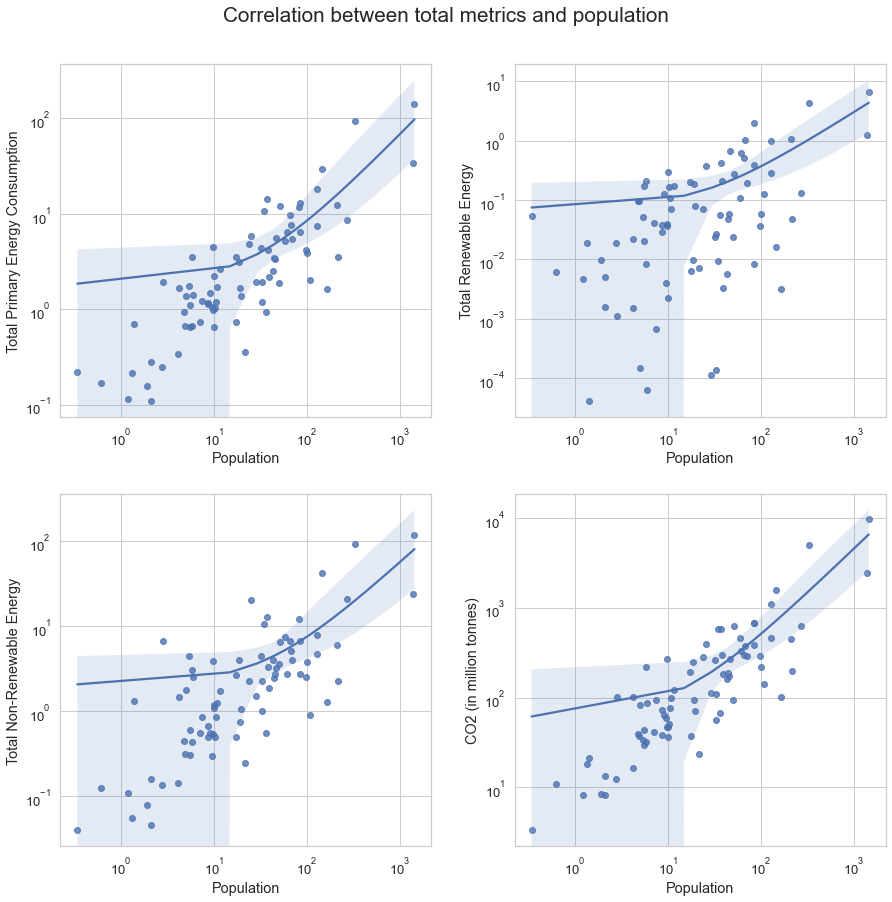

In [298]:
sns.set(rc={'figure.figsize':(13, 13)}, font_scale = 1.2, style = "whitegrid")
df_year = df_final[df_final['Year']==2019 ]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

#df_year = df_year[(df_year["Population"] <400) & (df_year["Total Primary Energy Consumption"] < 50)]
plt.suptitle('Correlation between total metrics and population',fontsize = 'x-large')
plt.subplot(2,2,1)
sns.regplot(x=df_year['Population'], y=df_year['Total Primary Energy Consumption'])
plt.xscale("log")
plt.yscale("log")
plt.subplot(2, 2, 2)
sns.regplot(x=df_year['Population'], y=df_year['Total Renewable Energy'])
plt.xscale("log")
plt.yscale("log")
plt.subplot(2, 2, 3)
sns.regplot(x=df_year['Population'], y=df_year['Total Non-Renewable Energy'])
plt.xscale("log")
plt.yscale("log")
plt.subplot(2, 2, 4)
sns.regplot(x=df_year['Population'], y=df_year['CO2 (in million tonnes)'])
plt.xscale("log")
plt.yscale("log")
plt.tight_layout(pad=2)
plt.show()

The regression line appears as a curve on the log-log scale. We can see a clear positive correlation between each of these metrics and population

Let us look at Total Energy Consumption against population again, but this time on a linear scale.

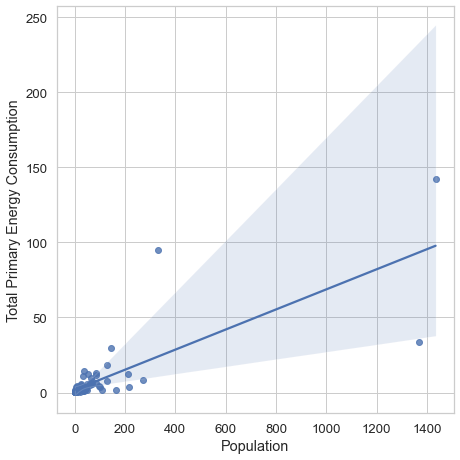

In [299]:
sns.set(rc={'figure.figsize':(7, 7)}, font_scale = 1.2, style = "whitegrid")
df_year = df_final[df_final['Year']==2019 ]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

sns.regplot(x=df_year['Population'], y=df_year['Total Primary Energy Consumption'])
plt.tight_layout(pad=2)
plt.show()

We can see a few outliers on this plot which either have very high population or very high total energy consumption. Let us identify these countries

In [300]:
df_outliers = df_year[(df_year['Total Primary Energy Consumption']>50) | (df_year["Population"] > 400)]
df_outliers

,Country,Year,Population,Region,Sub Region,OPEC,EU,OECD,CIS,CO2 (in million tonnes),Total Primary Energy Consumption,Total Renewable Energy,Total Non-Renewable Energy,Total Electricity,Electricity from Fossil Fuels,Electricity from Non-Fossil Fuels,Coal,Natural Gas,Oil,Nuclear,Hydroelectricity,Solar,Wind,Geothermal and Biomass,GDP,HDI
995,China,2019,1433.783692,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,9810.456419,142.028730,6.614682,117.191615,27.012341,18.334613,8.677728,79.755979,6.392154,27.935037,3.108444,11.343886,1.996821,3.612998,1.004863,16117.0,0.761
2111,India,2019,1366.417756,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,2471.946172,33.891359,1.241319,23.955472,5.773231,4.525404,1.247828,12.596442,0.968616,9.987815,0.402599,1.444266,0.412448,0.564407,0.264464,6754.0,0.645
6113,US,2019,329.064917,North America,North America,0.0,0.0,1.0,0.0,5029.389363,94.895969,4.311578,92.495278,15.880174,9.993688,5.886485,14.288595,33.479551,37.131994,7.595138,2.544767,0.962519,2.664251,0.684807,62683.0,0.926


In [301]:
outliers = list(df_outliers['Country'].unique())
print(outliers)

['China', 'India', 'US']


Now let us compare these plots with those for per-capita values

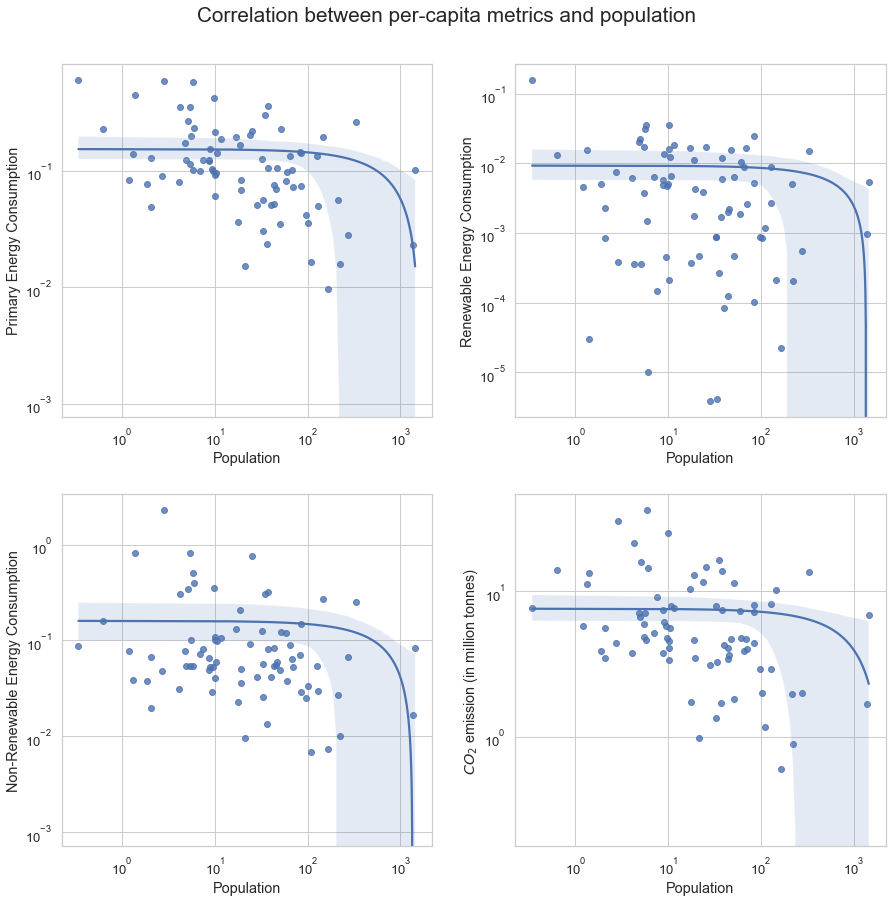

In [302]:
sns.set(rc={'figure.figsize':(13, 13)}, font_scale = 1.2, style = "whitegrid")
df_year = df_per_capita[df_per_capita['Year']==2020]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

plt.suptitle('Correlation between per-capita metrics and population',fontsize = 'x-large')
plt.subplot(2,2,1)
sns.regplot(x=df_year['Population'], y=df_year['Total Primary Energy Consumption'])
plt.xscale("log")
plt.ylabel('Primary Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 2)
sns.regplot(x=df_year['Population'], y=df_year['Total Renewable Energy'])
plt.xscale("log")
plt.ylabel('Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 3)
sns.regplot(x=df_year['Population'], y=df_year['Total Non-Renewable Energy'])
plt.xscale("log")
plt.ylabel('Non-Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 4)
sns.regplot(x=df_year['Population'], y=df_year['CO2 (in million tonnes)'])
plt.xscale("log")
plt.ylabel(r'$CO_2$ emission (in million tonnes)')
plt.yscale("log")
plt.tight_layout(pad=2)
plt.show()

We can clearly see that the dependence on population is far lesser with an almost horizontal regression line fitting the points. Above a certain population however we notice a sharp drop in per-capita energy consumption as well as emission. This lower per-capita consumption and CO2 emission in high population countries indicates poor resource availability or lower living standards in these high population countries.

We now plot GDP vs Population <br>
NOTE: GDP everywhere is GDP per capita

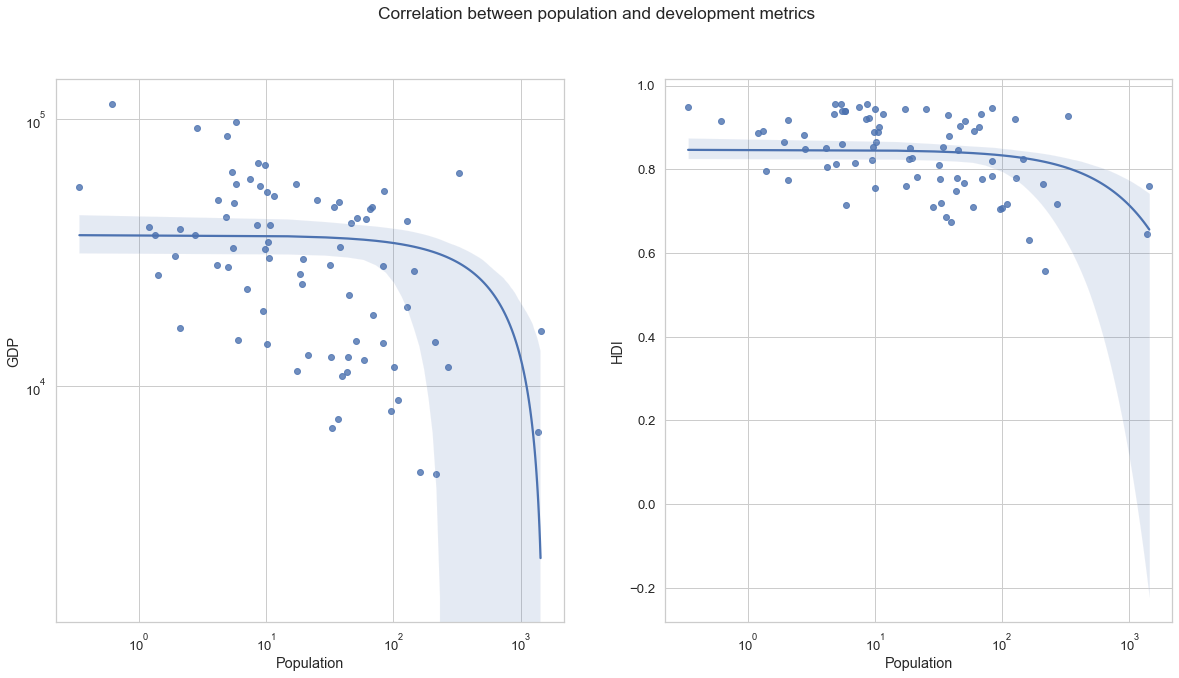

In [303]:
sns.set(rc={'figure.figsize':(20, 10)}, font_scale = 1.2, style = "whitegrid")
df_year = df_final[df_final['Year']==2019]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

plt.suptitle("Correlation between population and development metrics")
plt.subplot(1,2,1)
sns.regplot(y=df_year['GDP'], x=df_year['Population'])
plt.xscale("log")
plt.yscale("log")


plt.subplot(1,2,2)
sns.regplot(y=df_year['HDI'], x=df_year['Population'])
plt.xscale("log")
#plt.yscale("log")

plt.show()

These observations again verify the claim that countries with larger population are on average less developed (as estimated by GDP and HDI) but these are not strongly correlated with population

Next we will see how energy usage and CO2 emission is correlated with GDP

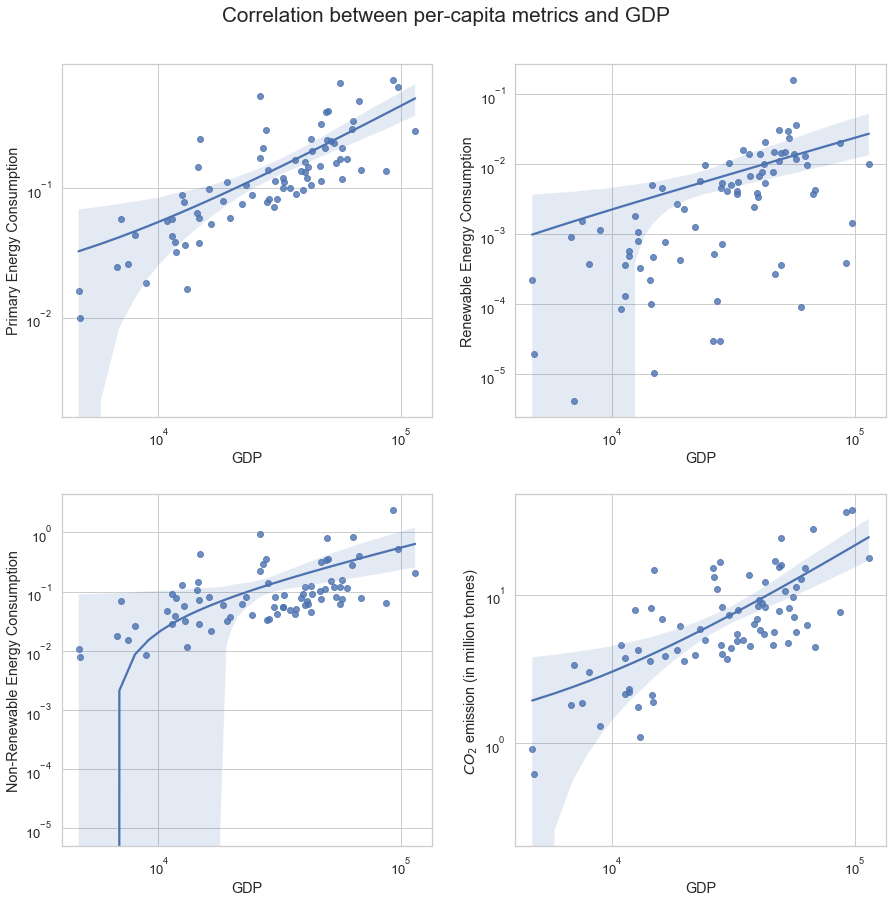

In [304]:
sns.set(rc={'figure.figsize':(13, 13)}, font_scale = 1.2, style = "whitegrid")
df_year = df_per_capita[df_per_capita['Year']==2019]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

plt.suptitle('Correlation between per-capita metrics and GDP',fontsize = 'x-large')
plt.subplot(2,2,1)
sns.regplot(x=df_year['GDP'], y=df_year['Total Primary Energy Consumption'])
#r = r2_score(list(df_year['GDP']), list(df_year['Total Primary Energy Consumption']))
#plt.text(r)
plt.xscale("log")
plt.ylabel('Primary Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 2)
sns.regplot(x=df_year['GDP'], y=df_year['Total Renewable Energy'])
plt.xscale("log")
plt.ylabel('Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 3)
sns.regplot(x=df_year['GDP'], y=df_year['Total Non-Renewable Energy'])
plt.xscale("log")
plt.ylabel('Non-Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 4)
sns.regplot(x=df_year['GDP'], y=df_year['CO2 (in million tonnes)'])
plt.xscale("log")
plt.ylabel(r'$CO_2$ emission (in million tonnes)')
plt.yscale("log")
plt.tight_layout(pad=2)
plt.show()

We can see a clear increasing trend for all 4 plots. This is indicative of the fact that more developed countries (as measured by GDP) enjoy a higher standard of living and thus, individuals consume more energy and also generate more CO2 on average.

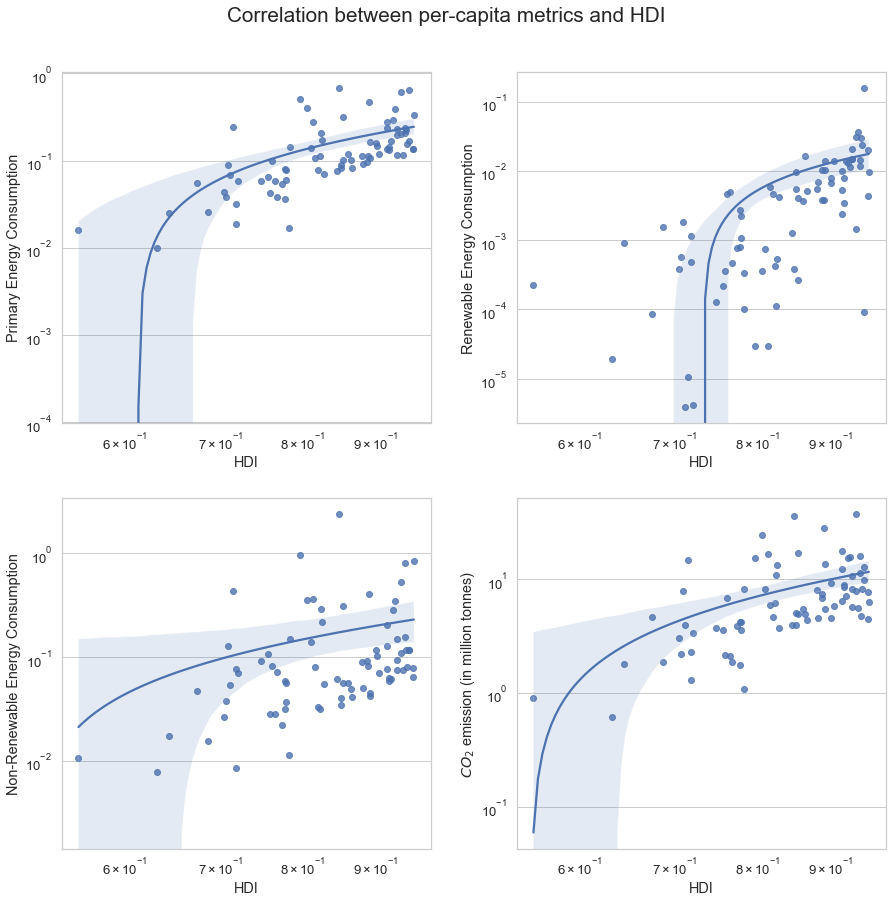

In [305]:
sns.set(rc={'figure.figsize':(13, 13)}, font_scale = 1.2, style = "whitegrid")
df_year = df_per_capita[df_per_capita['Year']==2019]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

plt.suptitle('Correlation between per-capita metrics and HDI',fontsize = 'x-large')
plt.subplot(2,2,1)
sns.regplot(x=df_year['HDI'], y=df_year['Total Primary Energy Consumption'])
plt.xscale("log")
plt.ylabel('Primary Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 2)
sns.regplot(x=df_year['HDI'], y=df_year['Total Renewable Energy'])
plt.xscale("log")
plt.ylabel('Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 3)
sns.regplot(x=df_year['HDI'], y=df_year['Total Non-Renewable Energy'])
plt.xscale("log")
plt.ylabel('Non-Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 4)
sns.regplot(x=df_year['HDI'], y=df_year['CO2 (in million tonnes)'])
plt.xscale("log")
plt.ylabel(r'$CO_2$ emission (in million tonnes)')
plt.yscale("log")
plt.tight_layout(pad=2)
plt.show()

Similar to the plots against GDP, we see an increasing trend for all 4 plots. In order to compare the degree of correlation for the variables analysed so far we will plot a correlation heatmap. 

In [306]:
sns.set(rc={'figure.figsize':(9,7)}, font_scale = 1.2, style = "whitegrid")
df_mx = df_per_capita[['Total Primary Energy Consumption','Total Renewable Energy','Total Non-Renewable Energy','CO2 (in million tonnes)', 'GDP', 'HDI','Population']]
rename_cols = ['Primary Energy Consumption per capita','Renewable Energy per capita','Non-Renewable Energy per capita',r'$CO_2$ (in million tonnes)','GDP', 'HDI','Population']
rename_dict = dict(zip(list(df_mx.columns),rename_cols))
df_mx.rename(columns = rename_dict, inplace = True)
df_mx = df_mx.corr()

D:\installations\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [307]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [308]:
import matplotlib
orig_cmap = matplotlib.cm.BrBG
cmap_shifted =  shiftedColorMap(orig_cmap, midpoint = .23)

C:\Users\Pranava\AppData\Local\Temp/ipykernel_16660/836158580.py:48: UserWarning: Trying to register the cmap 'shiftedcmap' which already exists.
  plt.register_cmap(cmap=newcmap)


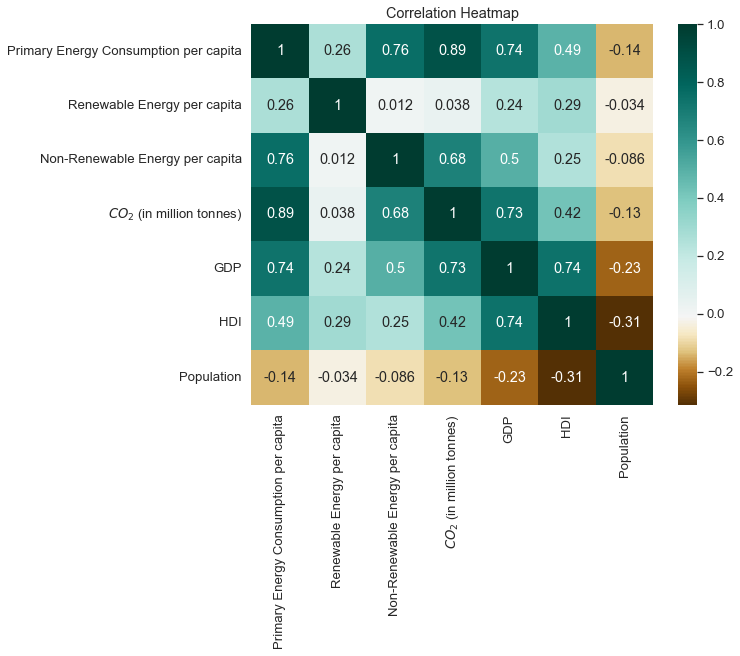

In [309]:
sns.heatmap(df_mx, annot = True, cmap =cmap_shifted)
plt.title('Correlation Heatmap')
plt.show()

#### Positive correlation
Primary Energy Consumption with Non-renewable energy consumption, CO2 emission and GDP <br>
Non-renewable energy consumption has strong positive correlation with CO2 emissions <br>
CO2 has strong positive correlation with GDP <br>

#### Negative correlation
Population has negative correlation with GDP and HDI

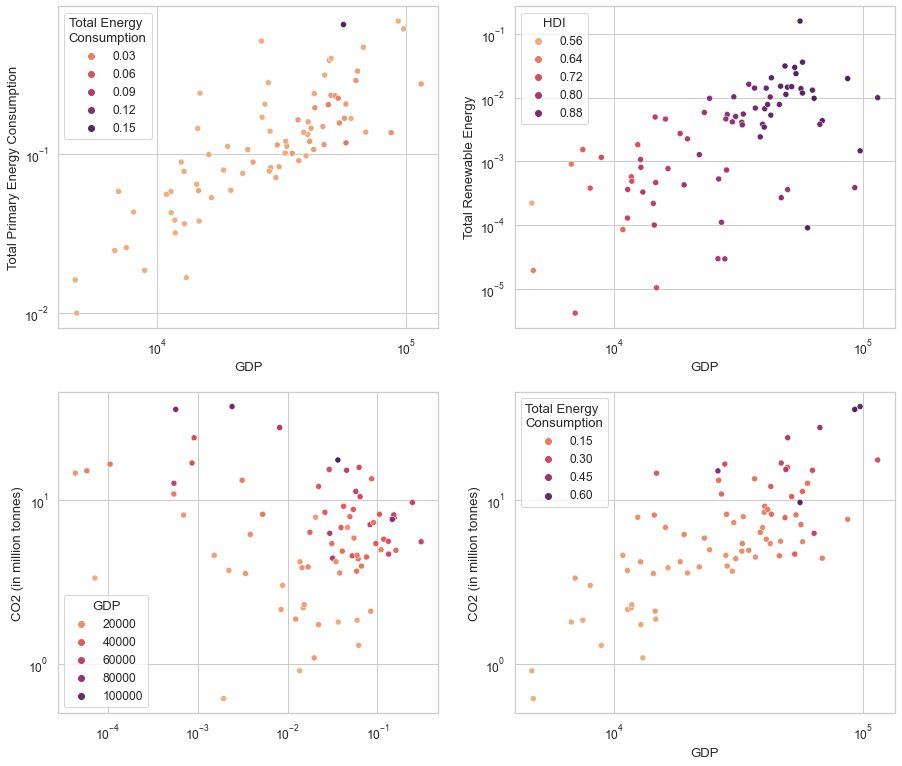

In [310]:
sns.set(rc={'figure.figsize':(15, 13)}, font_scale = 1.1, style = "whitegrid")
df_year = df_per_capita[df_per_capita['Year']==2019]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

plt.subplot(2,2,1)
sns.scatterplot(x=df_year['GDP'], y=df_year['Total Primary Energy Consumption'], hue = df_year["Total Renewable Energy"], palette = 'flare')
plt.legend(title = "Total Energy" + "\n" + "Consumption")
plt.xscale("log")
plt.yscale("log")
plt.subplot(2, 2, 2)
sns.scatterplot(x=df_year['GDP'], y=df_year['Total Renewable Energy'],  hue = df_year["HDI"],  palette = 'flare')
plt.legend(title = "HDI") 
plt.xscale("log")
plt.yscale("log")
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_year["Total Renewable Energy"] /df_year['Total Primary Energy Consumption'], y=df_year['CO2 (in million tonnes)'], hue = df_year["GDP"],  palette = 'flare')
plt.legend(title = "GDP")
plt.xscale("log")
plt.yscale("log")
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_year['GDP'], y=df_year['CO2 (in million tonnes)'], hue = df_year['Total Primary Energy Consumption'],  palette = 'flare')
plt.legend(title = "Total Energy" + "\n" + "Consumption")
plt.xscale("log")
plt.yscale("log")
plt.show()

### Identify countries with maximum and minimum per capita energy consumption, renewable usage and non renewable usage

Per capita total energy consumption

In [311]:
total_energy_df = df_per_capita[df_per_capita['Year'] == 2020][['Country','Total Primary Energy Consumption']].copy()

Dropping country groups, only keeping individual countries and then sorting the data

In [312]:
total_energy_df = total_energy_df[~total_energy_df['Country'].str.contains(pat = "Total")] 
total_energy_df.sort_values(by = ['Total Primary Energy Consumption'],inplace = True, ascending = False)

__Top 5 energy consumers (on a per-capita basis)__

In [313]:
total_energy_df.head(5)

,Country,Total Primary Energy Consumption
2056,Iceland,0.601831
3946,Qatar,0.594159
4266,Singapore,0.583891
5890,Trinidad & Tobago,0.445679
6282,United Arab Emirates,0.423668


__Lowest 5 energy consumers (on a per-capita basis)__

In [314]:
total_energy_df.tail(5)

,Country,Total Primary Energy Consumption
2112,India,0.023177
3778,Philippines,0.016654
3625,Pakistan,0.015728
4658,Sri Lanka,0.015254
441,Bangladesh,0.009664


Seeing this data on a plot

In [315]:
top_n_bottom_5 = pd.concat([total_energy_df.head(5),total_energy_df.tail(5)], ignore_index = True)
type_list = ['Top 5' for x in range(10)]
type_list[5:] = ['Bottom 5' for x in range(5)]
top_n_bottom_5['type'] = type_list
top_n_bottom_5

,Country,Total Primary Energy Consumption,type
0,Iceland,0.601831,Top 5
1,Qatar,0.594159,Top 5
2,Singapore,0.583891,Top 5
3,Trinidad & Tobago,0.445679,Top 5
4,United Arab Emirates,0.423668,Top 5
5,India,0.023177,Bottom 5
6,Philippines,0.016654,Bottom 5
7,Pakistan,0.015728,Bottom 5
8,Sri Lanka,0.015254,Bottom 5
9,Bangladesh,0.009664,Bottom 5


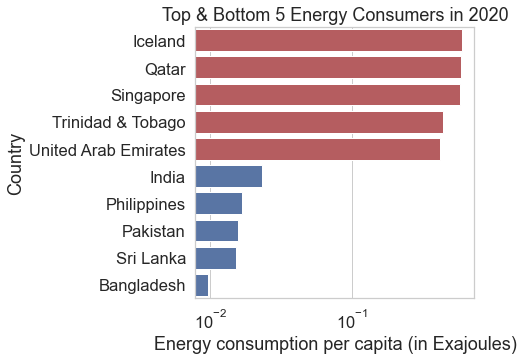

In [316]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1.5, style = "whitegrid")
sns.barplot(y = 'Country', x = 'Total Primary Energy Consumption', data = top_n_bottom_5, hue = 'type', orient = 'h', palette = ['r', 'b'], dodge = False)
plt.title('Top & Bottom 5 Energy Consumers in 2020')
ax = plt.gca()
ax.legend_ = None # Hide the legend
plt.xlabel('Energy consumption per capita (in Exajoules)')
plt.xscale('log')
plt.show()

Note that we are using a log-scale for this plot since the smaller values are not visible on a linear plot

Per capita renewable energy consumption

In [317]:
renewable_energy_df = df_per_capita[df_per_capita['Year'] == 2020][['Country','Total Renewable Energy']].copy()

Dropping country groups, only keeping individual countries and then sorting the data

In [318]:
renewable_energy_df = renewable_energy_df[~renewable_energy_df['Country'].str.contains(pat = "Total")] 
renewable_energy_df.sort_values(by = ['Total Renewable Energy'],inplace = True, ascending = False)

__Top 5 renewable energy consumers (on a per-capita basis)__

In [319]:
renewable_energy_df.head(5)

,Country,Total Renewable Energy
2056,Iceland,0.155308
4770,Sweden,0.035282
1440,Denmark,0.034980
1720,Finland,0.031327
1888,Germany,0.024634


__Lowest 5 renewable energy consumers (on a per-capita basis)__

In [320]:
renewable_energy_df.tail(5)

,Country,Total Renewable Energy
5890,Trinidad & Tobago,0.000030
441,Bangladesh,0.000023
6058,Turkmenistan,0.000010
6394,Uzbekistan,0.000004
6450,Venezuela,0.000004


Seeing this data on a plot

In [321]:
top_n_bottom_5 = pd.concat([renewable_energy_df.head(5), renewable_energy_df.tail(5)], ignore_index = True)
type_list = ['Top 5' for x in range(10)]
type_list[5:] = ['Bottom 5' for x in range(5)]
top_n_bottom_5['type'] = type_list
top_n_bottom_5

,Country,Total Renewable Energy,type
0,Iceland,0.155308,Top 5
1,Sweden,0.035282,Top 5
2,Denmark,0.034980,Top 5
3,Finland,0.031327,Top 5
4,Germany,0.024634,Top 5
5,Trinidad & Tobago,0.000030,Bottom 5
6,Bangladesh,0.000023,Bottom 5
7,Turkmenistan,0.000010,Bottom 5
8,Uzbekistan,0.000004,Bottom 5
9,Venezuela,0.000004,Bottom 5


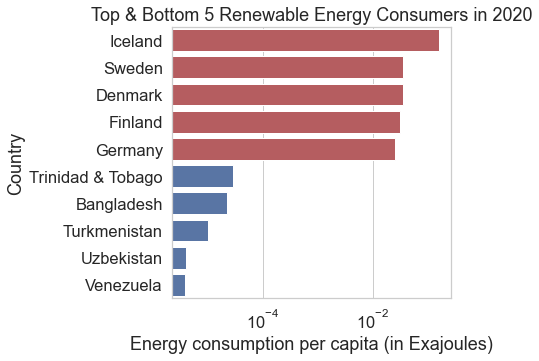

In [322]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1.5, style = "whitegrid")
sns.barplot(y = 'Country', x = 'Total Renewable Energy', data = top_n_bottom_5, hue = 'type', orient = 'h', palette = ['r', 'b'], dodge = False, ci = "None")
plt.title('Top & Bottom 5 Renewable Energy Consumers in 2020')
ax = plt.gca()
ax.legend_ = None # Hide the legend
plt.xlabel('Energy consumption per capita (in Exajoules)')
plt.xscale('log')
plt.show()

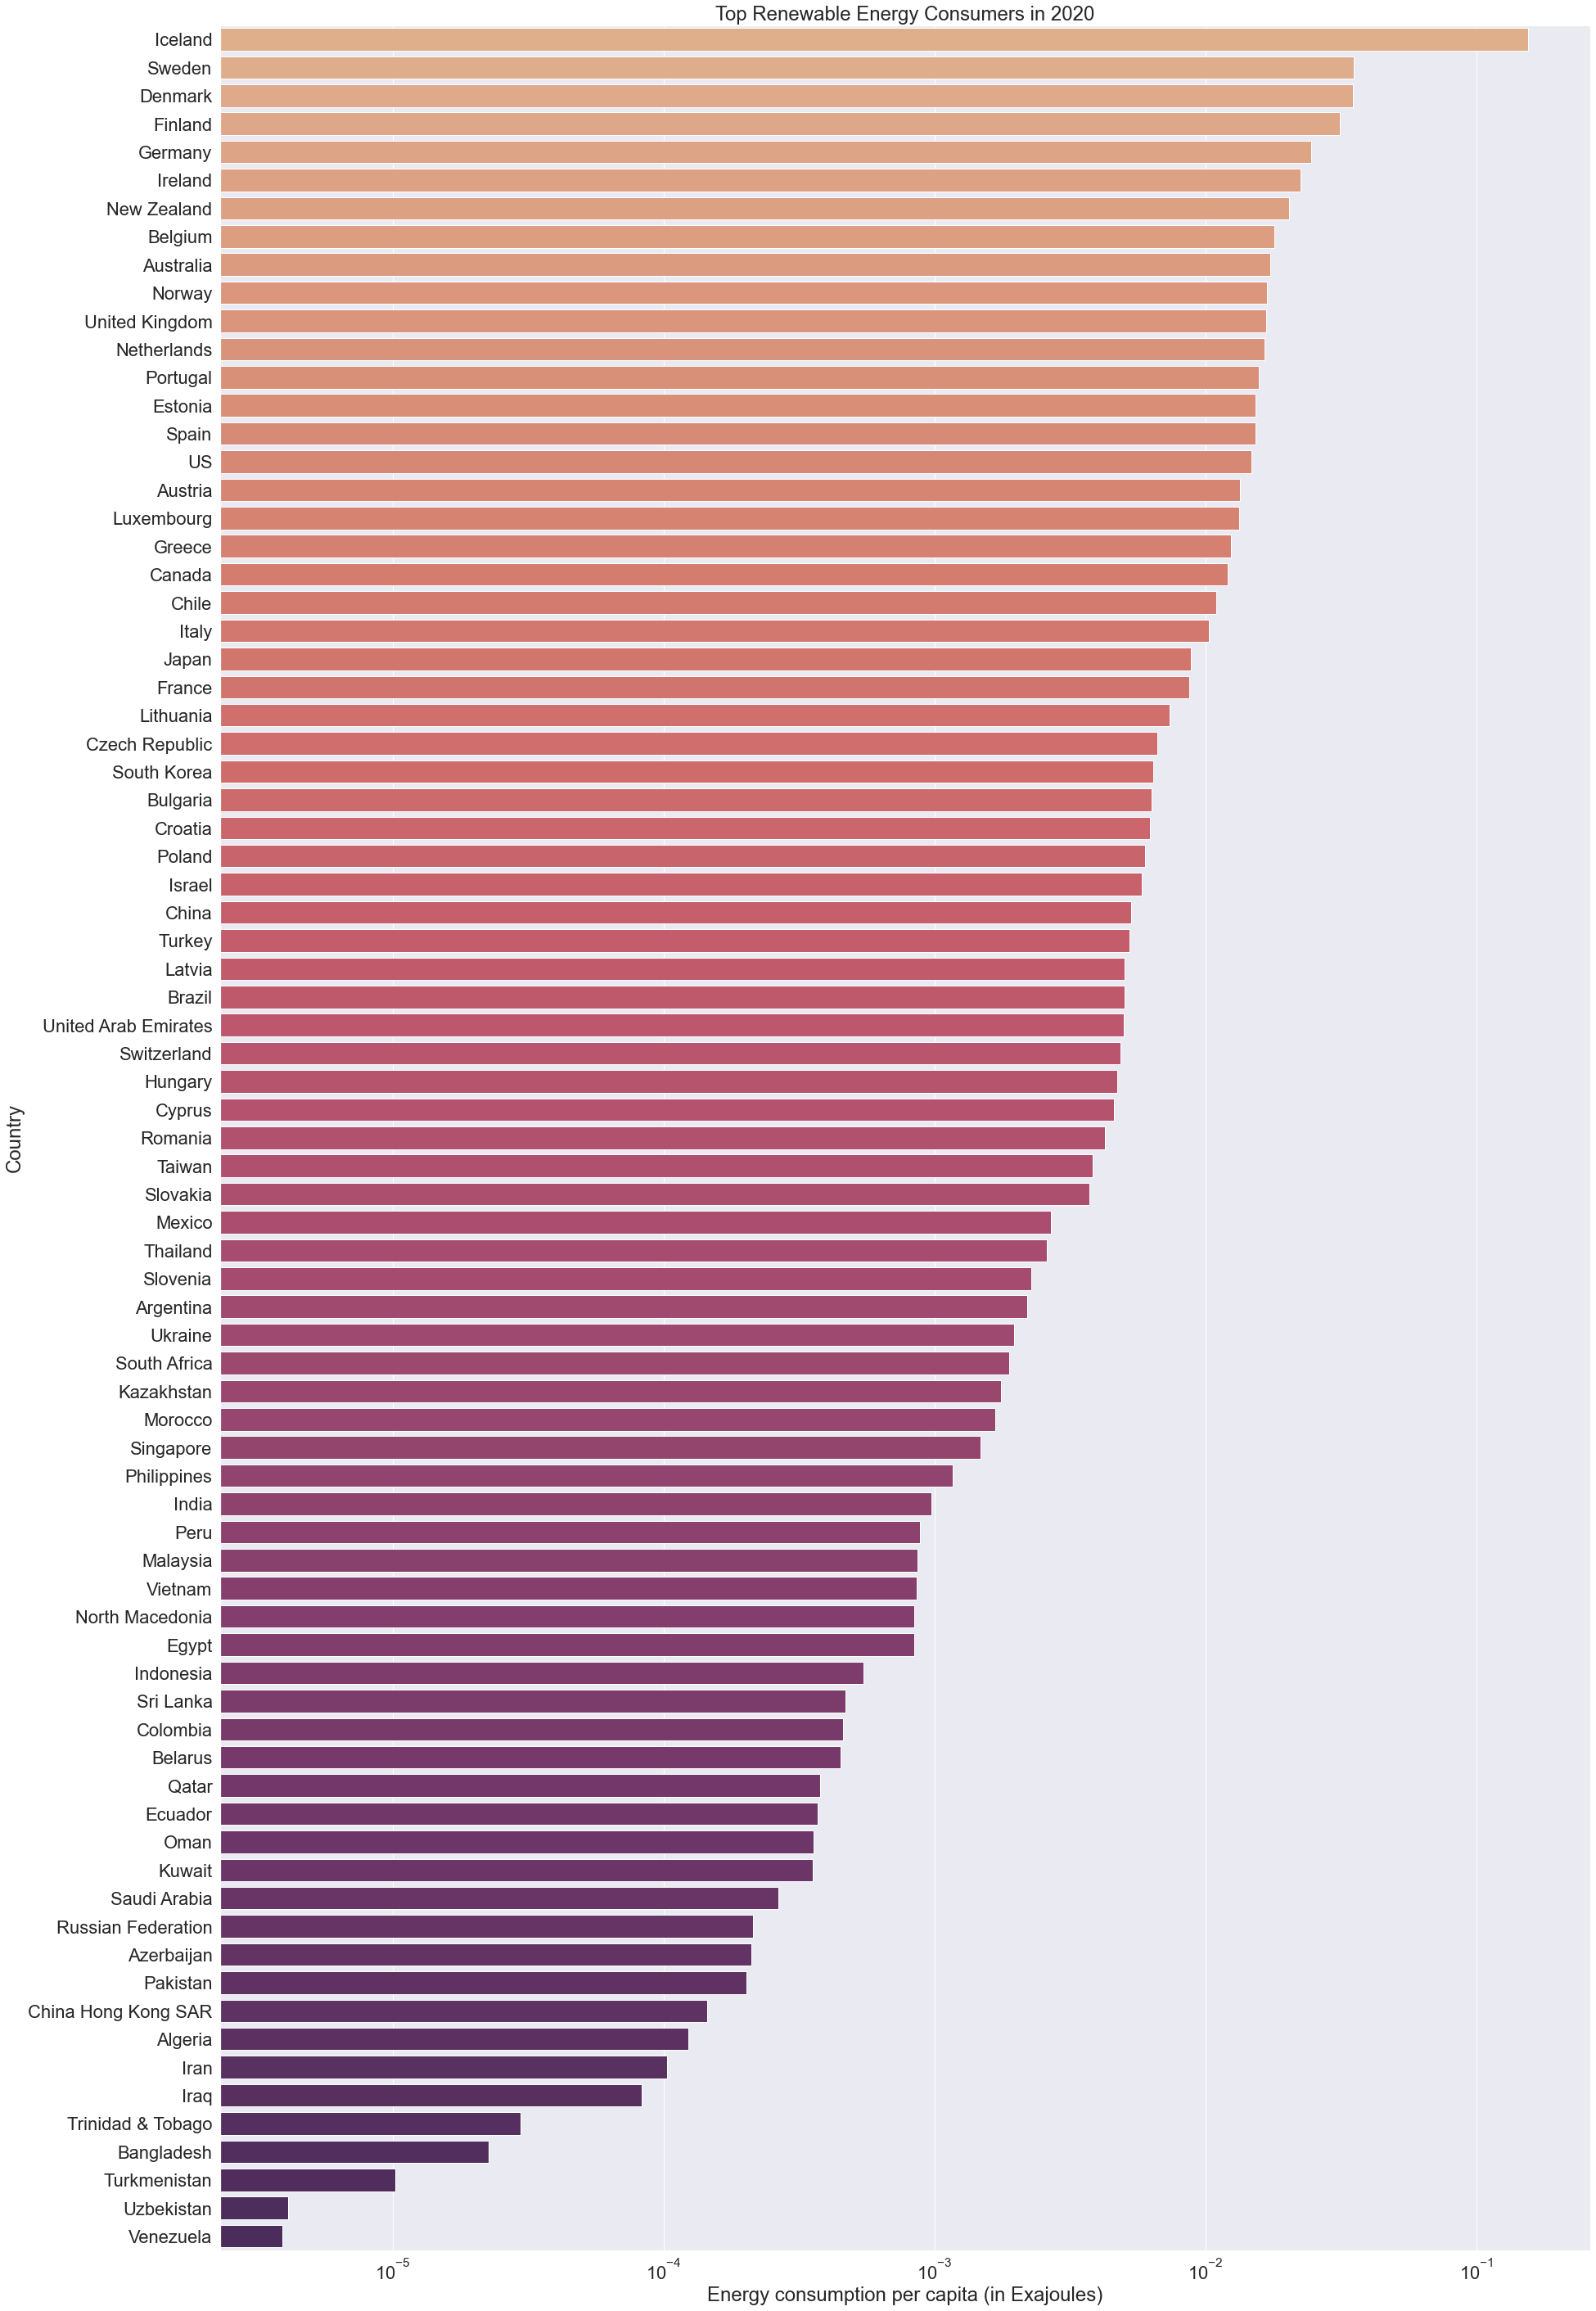

In [323]:
sns.set_theme(style="whitegrid")
#sns.color_palette("flare")
#sns.set_context('paper', font_scale = 1.4)
sns.set(rc={'figure.figsize':(30,50)}, font_scale = 2)
sns.barplot(y = 'Country', x = 'Total Renewable Energy', 
            data = df_per_capita[(df_per_capita['Year']==2020) & ~(df_per_capita['Country'].str.contains(pat = "Total"))].sort_values(['Total Renewable Energy'], 
            ascending=[False]),dodge=False, orient = 'h', ci = None, palette = "flare" ) #hue = 'type', orient = 'h', palette = ['r', 'b'],dodge=False)
plt.title('Top Renewable Energy Consumers in 2020')

ax = plt.gca()
ax.legend_ = None # Hide the legend
plt.xlabel('Energy consumption per capita (in Exajoules)')
plt.xscale('log')
plt.show()

Surprisingly Trinidad and Tobago which was among the top energy consumers, consumes very little renewable energy. This suggests that most of its consumption is non-renewable. We will verify this further

Per capita non-renewable energy consumption

In [324]:
non_renewable_energy_df = df_per_capita[df_per_capita['Year'] == 2020][['Country','Total Non-Renewable Energy']].copy()

Dropping country groups, only keeping individual countries and then sorting the data

In [325]:
non_renewable_energy_df = non_renewable_energy_df[~non_renewable_energy_df['Country'].str.contains(pat = "Total")] 
non_renewable_energy_df.sort_values(by = ['Total Non-Renewable Energy'],inplace = True, ascending = False)

__Top 5 non-renewable energy consumers (on a per-capita basis)__

In [326]:
non_renewable_energy_df.head(5)

,Country,Total Non-Renewable Energy
3946,Qatar,2.297362
5890,Trinidad & Tobago,0.814626
3513,Norway,0.809104
223,Australia,0.760161
4266,Singapore,0.501526


__Lowest 5 non-renewable energy consumers (on a per-capita basis)__

In [327]:
non_renewable_energy_df.tail(5)

,Country,Total Non-Renewable Energy
3074,Morocco,0.013511
3625,Pakistan,0.010020
4658,Sri Lanka,0.009620
441,Bangladesh,0.007415
3778,Philippines,0.006829


Seeing this data on a plot

In [328]:
top_n_bottom_5 = pd.concat([non_renewable_energy_df.head(5), non_renewable_energy_df.tail(5)], ignore_index = True)
type_list = ['Top 5' for x in range(10)]
type_list[5:] = ['Bottom 5' for x in range(5)]
top_n_bottom_5['type'] = type_list
top_n_bottom_5

,Country,Total Non-Renewable Energy,type
0,Qatar,2.297362,Top 5
1,Trinidad & Tobago,0.814626,Top 5
2,Norway,0.809104,Top 5
3,Australia,0.760161,Top 5
4,Singapore,0.501526,Top 5
5,Morocco,0.013511,Bottom 5
6,Pakistan,0.010020,Bottom 5
7,Sri Lanka,0.009620,Bottom 5
8,Bangladesh,0.007415,Bottom 5
9,Philippines,0.006829,Bottom 5


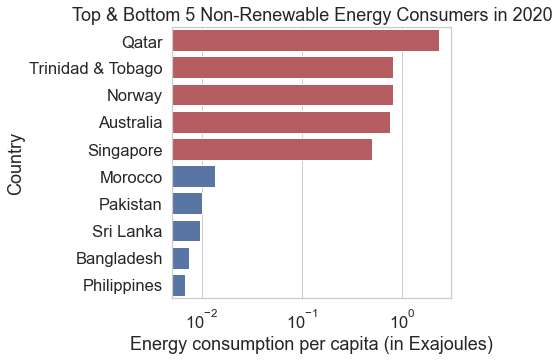

In [329]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1.5, style = "whitegrid")
sns.barplot(y = 'Country', x = 'Total Non-Renewable Energy', data = top_n_bottom_5, hue = 'type', orient = 'h', palette = ['r', 'b'], dodge = False)
plt.title('Top & Bottom 5 Non-Renewable Energy Consumers in 2020')
ax = plt.gca()
ax.legend_ = None # Hide the legend
plt.xlabel('Energy consumption per capita (in Exajoules)')
plt.xscale('log')
plt.show()

Let us also obtain the top and bottom 5 $CO_2$ emitters

In [330]:
co2_df = df_per_capita[df_per_capita['Year'] == 2020][['Country','CO2 (in million tonnes)']].copy()
co2_df = co2_df[~co2_df['Country'].str.contains(pat = "Total")] 
co2_df.sort_values(by = ['CO2 (in million tonnes)'],inplace = True, ascending = False)

top_n_bottom_5 = pd.concat([co2_df.head(5), co2_df.tail(5)], ignore_index = True)
type_list = ['Top 5' for x in range(10)]
type_list[5:] = ['Bottom 5' for x in range(5)]
top_n_bottom_5['type'] = type_list
top_n_bottom_5

,Country,CO2 (in million tonnes),type
0,Singapore,36.068728,Top 5
1,Qatar,30.424702,Top 5
2,United Arab Emirates,24.862584,Top 5
3,Kuwait,21.442510,Top 5
4,Saudi Arabia,16.397049,Top 5
5,Peru,1.351350,Bottom 5
6,Philippines,1.162633,Bottom 5
7,Sri Lanka,0.973562,Bottom 5
8,Pakistan,0.887511,Bottom 5
9,Bangladesh,0.594951,Bottom 5


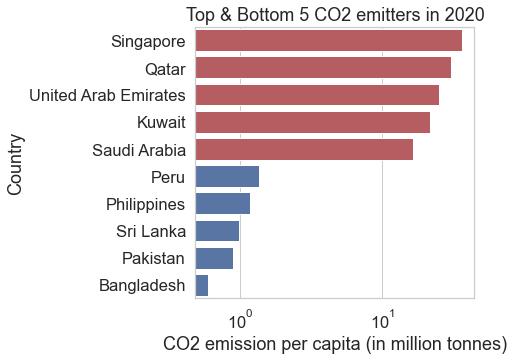

In [331]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1.5, style = "whitegrid")
sns.barplot(y = 'Country', x = 'CO2 (in million tonnes)', data = top_n_bottom_5, hue = 'type', orient = 'h', palette = ['r', 'b'], dodge = False)
plt.title('Top & Bottom 5 CO2 emitters in 2020')
ax = plt.gca()
ax.legend_ = None # Hide the legend
plt.xlabel('CO2 emission per capita (in million tonnes)')
plt.xscale('log')
plt.show()

We can observe that Singapore and Qatar while being top non-renewable consumers are also top $CO_2$ emitters. None of the top renewable users feature on this list. This also goes to show the lower $CO_2$ emission of renewables.

### Categorise countries based on GDP

We will divide countries into 4 quantiles based on GDP

In [332]:
def returnGDPcat(x, year):
    gdp_quartile = pd.DataFrame(df_final[df_final["Year"] == year]["GDP"].quantile([0.25,0.5,0.75]))
    if np.isnan(x):
        return np.nan
    if x < gdp_quartile["GDP"][.25]:
        return 0            # Low Income
    elif x < gdp_quartile["GDP"][.50]:
        return 1            # Lower middle Income
    elif x < gdp_quartile["GDP"][.75]:
        return 2            # Upper middle Income
    else:
        return 3            # High Income

gdp_category = pd.DataFrame(np.nan, index = range(df.shape[0]), columns=['GDP Category'])
for i in df_final.index:
    cat = returnGDPcat(df_final['GDP'][i], df_final['Year'][i] )
    gdp_category['GDP Category'][i] = cat

df_final = df_final.join(gdp_category)

Similarly for per capita data

In [333]:
df_per_capita = df_per_capita.join(gdp_category)

In [334]:

countries_by_gdp = {0:[],1:[],2:[],3:[]}
for i in range(4):
    countries_by_gdp[i] = list(df_final[(df_final['Year']==2019) & (df_final['GDP Category'] == i)]['Country'].unique())

print(countries_by_gdp)

{0: ['Algeria', 'Azerbaijan', 'Bangladesh', 'Brazil', 'Ecuador', 'Egypt', 'India', 'Indonesia', 'Iran', 'Iraq', 'Morocco', 'Pakistan', 'Peru', 'Philippines', 'South Africa', 'Sri Lanka', 'Ukraine', 'Uzbekistan', 'Vietnam'], 1: ['Argentina', 'Belarus', 'Bulgaria', 'Chile', 'China', 'Colombia', 'Croatia', 'Greece', 'Kazakhstan', 'Malaysia', 'Mexico', 'North Macedonia', 'Oman', 'Romania', 'Russian Federation', 'Thailand', 'Trinidad & Tobago', 'Turkey', 'Turkmenistan'], 2: ['Cyprus', 'Czech Republic', 'Estonia', 'France', 'Hungary', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'New Zealand', 'Poland', 'Portugal', 'Saudi Arabia', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'United Kingdom'], 3: ['Australia', 'Austria', 'Belgium', 'Canada', 'China Hong Kong SAR', 'Denmark', 'Finland', 'Germany', 'Iceland', 'Ireland', 'Kuwait', 'Luxembourg', 'Netherlands', 'Norway', 'Qatar', 'Singapore', 'Sweden', 'Switzerland', 'US', 'United Arab Emirates']}


Now let us look at the trends for various quanities of interest in these 4 GDP groups. Let us also identify important trends within these groups

Time series analysis

In [ ]:
sns.set(rc={'figure.figsize':(13, 13)}, font_scale = 1.2, style = "whitegrid")
df_year = df_per_capita[df_per_capita['Year']==2019]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

plt.suptitle('Correlation between per-capita metrics and HDI',fontsize = 'x-large')
plt.subplot(2,2,1)
sns.regplot(x=df_year['HDI'], y=df_year['Total Primary Energy Consumption'])
plt.xscale("log")
plt.ylabel('Primary Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 2)
sns.regplot(x=df_year['HDI'], y=df_year['Total Renewable Energy'])
plt.xscale("log")
plt.ylabel('Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 3)
sns.regplot(x=df_year['HDI'], y=df_year['Total Non-Renewable Energy'])
plt.xscale("log")
plt.ylabel('Non-Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 4)
sns.regplot(x=df_year['HDI'], y=df_year['CO2 (in million tonnes)'])
plt.xscale("log")
plt.ylabel(r'$CO_2$ emission (in million tonnes)')
plt.yscale("log")
plt.tight_layout(pad=2)
plt.show()

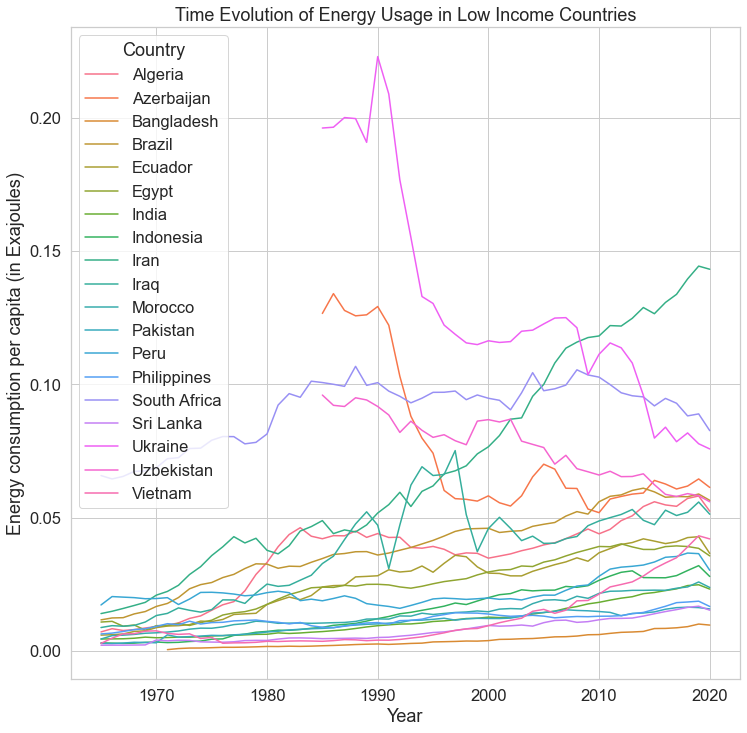

In [352]:
df_low_income = df_per_capita[df_per_capita['Country'].isin(countries_by_gdp[0])]

sns.set(rc={'figure.figsize':(12, 12)}, font_scale = 1.5, style = "whitegrid")
sns.lineplot(x = 'Year', y= 'Total Primary Energy Consumption', hue = 'Country',data = df_low_income)
plt.title('Time Evolution of Energy Usage in Low Income Countries')
ax = plt.gca()
#ax.legend_ = None # Hide the legend
plt.ylabel('Energy consumption per capita (in Exajoules)')
plt.show()

In [353]:
df_final[df_final['Year']==2019][['Country','GDP Category']]

,Country,GDP Category
54,Algeria,0.0
166,Argentina,1.0
222,Australia,3.0
278,Austria,3.0
334,Azerbaijan,0.0
...,...,...
6281,United Arab Emirates,3.0
6337,United Kingdom,2.0
6393,Uzbekistan,0.0
6449,Venezuela,NaN


### 2. Stacked bar plots (Year 2020) for selected countries (100%/Non-scaled)

In [337]:
grp = df_per_capita[df_per_capita['Year']==2020].groupby('GDP Category')
grp['Total Primary Energy Consumption'].agg('mean')

Series([], Name: Total Primary Energy Consumption, dtype: float64)

In [338]:
cou_lst = list(df_final[(df_final["GDP Category"] == 0) & (df_final["Year"] == 2019)].sort_values(["GDP"], ascending = [False])["Country"])
print((cou_lst))
cou_lst[0:3] + cou_lst[-3:]

['Brazil', 'Iran', 'Azerbaijan', 'Sri Lanka', 'Peru', 'Ukraine', 'South Africa', 'Indonesia', 'Egypt', 'Ecuador', 'Algeria', 'Iraq', 'Philippines', 'Vietnam', 'Morocco', 'Uzbekistan', 'India', 'Bangladesh', 'Pakistan']


['Brazil', 'Iran', 'Azerbaijan', 'India', 'Bangladesh', 'Pakistan']

In [339]:
cou_lst = list(df_final[(df_final["GDP Category"] == 1) & (df_final["Year"] == 2019)].sort_values(["GDP"], ascending = [False])["Country"])
print(cou_lst)
cou_lst[0:3] + cou_lst[-3:]

['Greece', 'Romania', 'Croatia', 'Malaysia', 'Turkey', 'Oman', 'Russian Federation', 'Kazakhstan', 'Trinidad & Tobago', 'Chile', 'Bulgaria', 'Argentina', 'Mexico', 'Belarus', 'Thailand', 'North Macedonia', 'China', 'Turkmenistan', 'Colombia']


['Greece', 'Romania', 'Croatia', 'China', 'Turkmenistan', 'Colombia']

In [340]:
cou_lst = list(df_final[(df_final["GDP Category"] == 2) & (df_final["Year"] == 2019)].sort_values(["GDP"], ascending = [False])["Country"])
print(cou_lst)
cou_lst[0:3] + cou_lst[-3:]

['Saudi Arabia', 'United Kingdom', 'France', 'New Zealand', 'South Korea', 'Italy', 'Japan', 'Spain', 'Czech Republic', 'Israel', 'Cyprus', 'Slovenia', 'Lithuania', 'Estonia', 'Portugal', 'Poland', 'Slovakia', 'Hungary', 'Latvia']


['Saudi Arabia', 'United Kingdom', 'France', 'Slovakia', 'Hungary', 'Latvia']

In [341]:
cou_lst = list(df_final[(df_final["GDP Category"] == 3) & (df_final["Year"] == 2019)].sort_values(["GDP"], ascending = [False])["Country"])
print((cou_lst))
cou_lst[0:3] + cou_lst[-3:]

['Luxembourg', 'Singapore', 'Qatar', 'Ireland', 'Switzerland', 'United Arab Emirates', 'Norway', 'US', 'China Hong Kong SAR', 'Denmark', 'Netherlands', 'Austria', 'Iceland', 'Germany', 'Sweden', 'Belgium', 'Kuwait', 'Australia', 'Canada', 'Finland']


['Luxembourg', 'Singapore', 'Qatar', 'Australia', 'Canada', 'Finland']

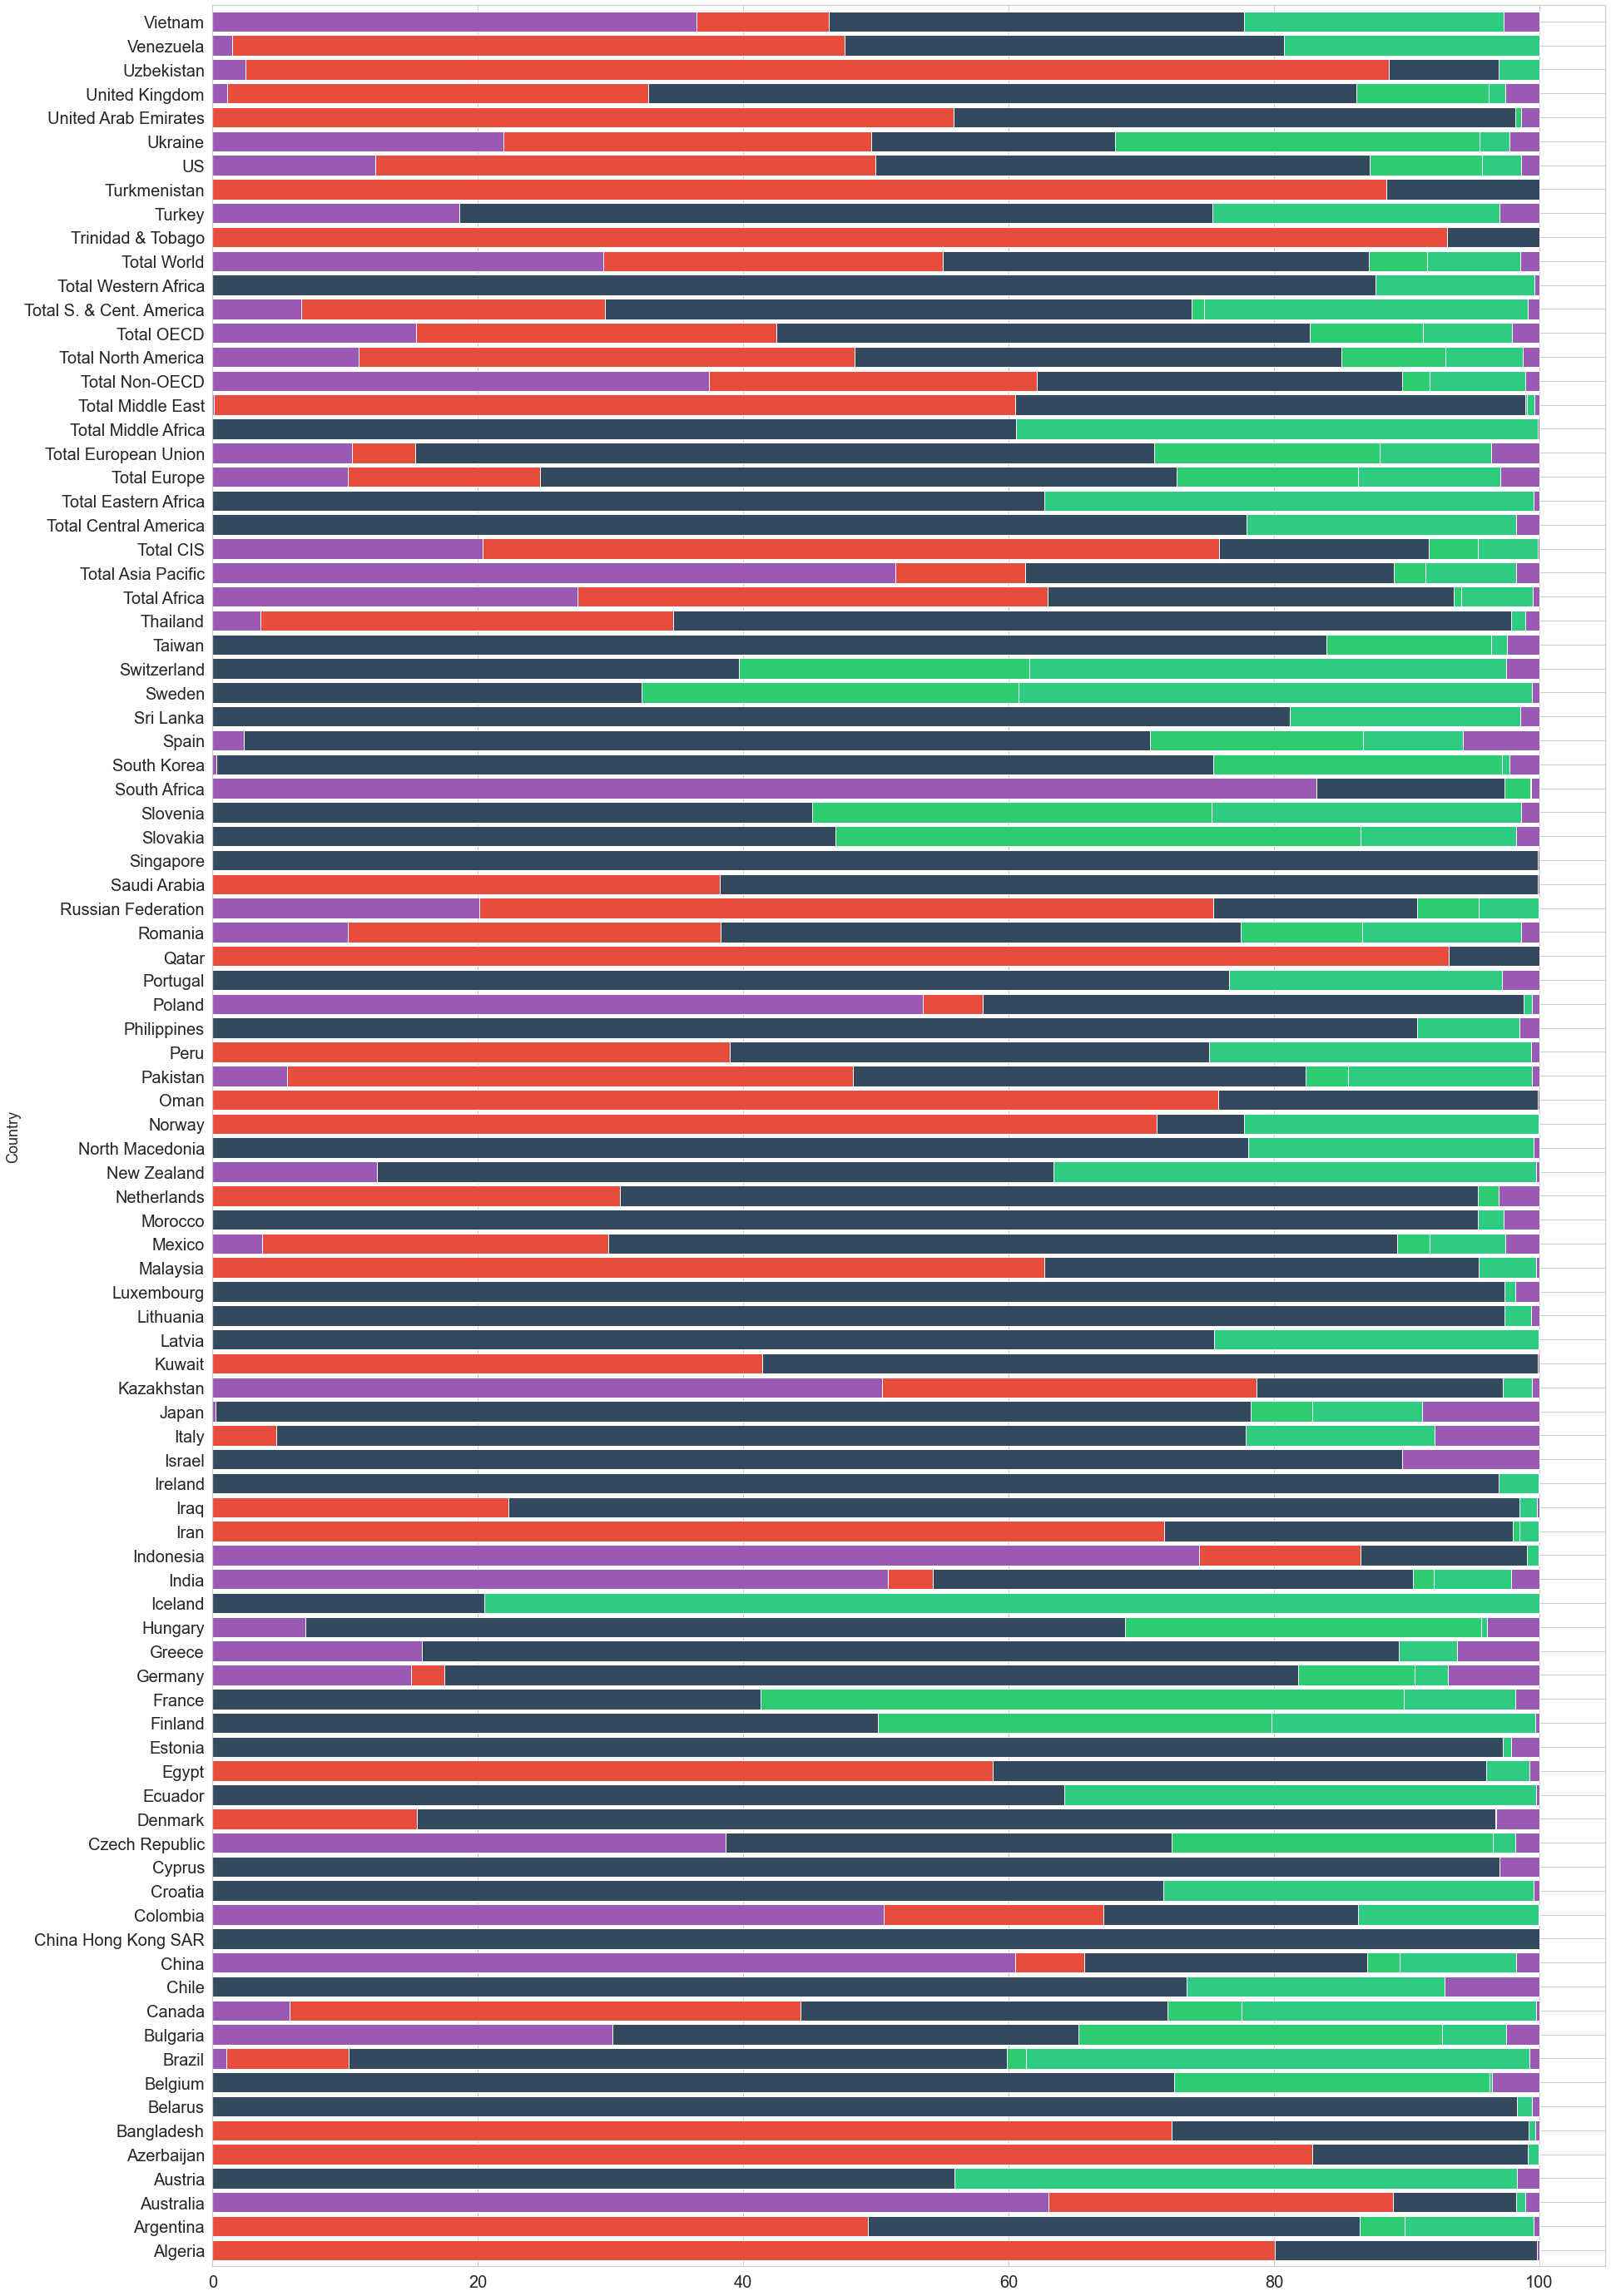

In [342]:
list_for_np = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar']
list_norm = []
for i in list_for_np:
    list_norm.append('Norm '+ i)
df_2020 = df_final[df_final['Year']==2020]
df_2020 = df_2020.reset_index()
numarray = df_2020[list_for_np].to_numpy()
numarray[np.isnan(numarray)] = 0
sumarray = np.sum(numarray, axis=1)
sumarray = np.reshape(sumarray, (94,1))
numarray = numarray/sumarray*100
numarray
df_2020_temp = pd.DataFrame(numarray, columns = list_norm)
df_2020 = df_2020.join(df_2020_temp)
df_2020.set_index('Country', inplace = True)


pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71", "#2ecc83"]
df_2020[list_norm].plot(kind = "barh", stacked = True, figsize = [30, 50], legend = None, color = pal, width = .85, fontsize = 20)
plt.rcParams.update({'font.size': 22})
plt.show()

### 3. Plot time-series data of different countries -  x-axis : Year, y-axis : Total/Renewable/non-renewable energy per capita

<ul>
<li>Corelation based on GDP/HDI/Primary/Renewable/Non renewable using scatter plot
<ol>
<li>GDP-HDI
<li>Total-GDP
<li>Total-HDI
<li>Renewable-GDP
<li>Renewable-HDI
<li>Non Renewable - GDP
<li>Non Renewable - HDI
</ol>
<li>Categorise countries based on GDP
</ul>

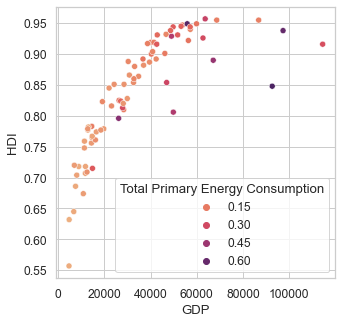

In [343]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1.1, style = "whitegrid")
df_2019 = df_per_capita[df_per_capita['Year']==2019]
df_2019.reset_index()
sns.scatterplot(x=df_2019['GDP'], y=df_2019['HDI'], hue=df_2019['Total Primary Energy Consumption'], palette = 'flare')
plt.show()

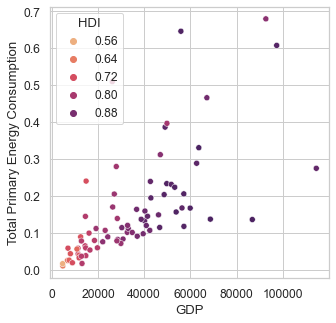

In [344]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1.1, style = "whitegrid")
df_2019 = df_per_capita[df_per_capita['Year']==2019]
df_2019.reset_index()
sns.scatterplot(x=df_2019['GDP'], y=df_2019['Total Primary Energy Consumption'], hue=df_2019['HDI'], palette = 'flare')
plt.show()

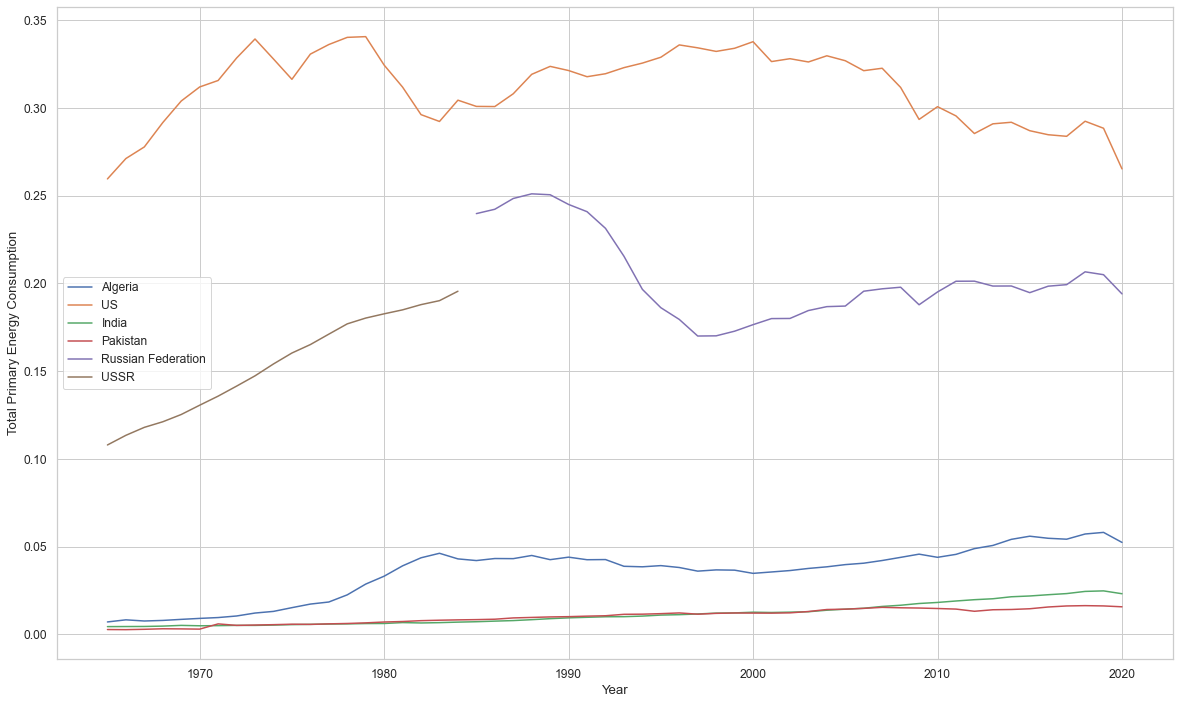

In [345]:
country_list_time = ['Algeria', 'US', 'India', 'Pakistan', 'Russian Federation', "USSR"]
sns.set(rc={'figure.figsize':(20, 12)}, font_scale = 1.1, style = "whitegrid")
plottingVar = 'Total Primary Energy Consumption'
for country in country_list_time:
    sns.lineplot(y = plottingVar, x = 'Year', data = df_per_capita[(df_per_capita['Country']==country)],legend='brief', label=country)
plt.show()

### 4. Top producers (one for each country) - stacked line plot to show evolution of relative distributions

### 5. Display energy production by source/fraction renewable(2020)/fraction non-renewable(2020)/total(2020) for all countries on the world map
fraction of total / per-capita / total - 3 options

### geopandas

In [346]:
import geopandas as gpd
from matplotlib import pyplot as plt
import pandas as pd
import mapclassify


countries_shape = gpd.read_file("Shape file/World_Countries.shp")
countries_shape = countries_shape.rename(columns={'COUNTRY': 'Country'})
countries_shape = countries_shape.set_index('Country')  
                             
# data is the data to plot. It is a dataframe of countriesx2 in the form (Country_name, Value to plot)
# colorScheme determines the "cmap" attribute's value for the plot. Options can be found for cmap in matplotlib
# isBig helps to choose between two different sizes of plots.

def geoPlot(data, colorScheme = 'Blues', fileName = 'plot', isBig = False):
    if isBig:
        pltSize = (70,35)
        fSize = 40
        legendScale = 4
    else:
        pltSize = (20,10)
        fSize = 12
        legendScale = 1.5


    data = data.set_index('Country')
    ### Changing Russian Federation to Russia
    if "Russian Federation" in data.index:
        as_list = data.index.tolist()
        idx = as_list.index('Russian Federation')
        as_list[idx] = 'Russia'
        data.index = as_list
    ### Changing US to United States
    if "US" in data.index:
        as_list = data.index.tolist()
        idx = as_list.index('US')
        as_list[idx] = 'United States'
        data.index = as_list
    ### Changing "Curacao" to "Curacao (Netherlands)"
    if "Curacao" in data.index:
        as_list = data.index.tolist()
        idx = as_list.index('Curacao')
        as_list[idx] = 'Curacao (Netherlands)'
        data.index = as_list
    ### Changing "Democratic Republic of Congo" to "Democratic Republic of the Congo"
    if "Democratic Republic of Congo" in data.index:
        as_list = data.index.tolist()
        idx = as_list.index('Democratic Republic of Congo')
        as_list[idx] = 'Democratic Republic of the Congo'
        data.index = as_list
    ### Changing "Trinidad & Tobago" to "Trinidad and Tobago"
    if "Trinidad & Tobago" in data.index:
        as_list = data.index.tolist()
        idx = as_list.index('Trinidad & Tobago')
        as_list[idx] = 'Trinidad and Tobago'
        data.index = as_list
    ### Setting index name
    data.index.name = 'Country'

    data.columns = ['Data']
    mergedDF = countries_shape.join(data)
    
    mergedDF.plot(cmap = colorScheme, column='Data', figsize= pltSize,
                  scheme='quantiles',  k=19, 
                  legend = True,
                  missing_kwds={
                      "color": "lightgrey",
                      "edgecolor": "grey",
                      "hatch": "///",
                      "label": "Missing values",
                      },
                  legend_kwds={
                      "fontsize":fSize,
                      "loc" :"lower left",
                      #"ncol" : 10,
                      'markerscale' : legendScale,
                      }
                  )
    plt.axis('off')
    plt.show()
    plt.savefig(fileName + '.png')

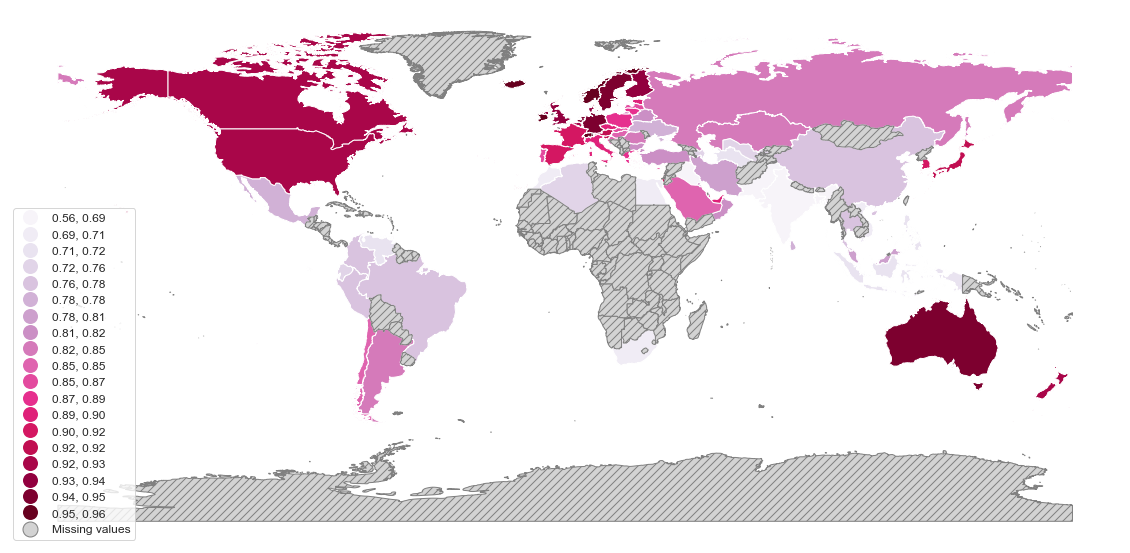

<Figure size 1440x864 with 0 Axes>

In [347]:
geoPlot(df_final[df_final['Year'] == 2019][['Country','HDI']],colorScheme='PuRd',fileName='HDI_test')

In [348]:
print(df_final['Country'].nunique())
print(df['Country'].nunique())

95
123


In [349]:
pd.set_option("display.max_rows", 10, "display.max_columns", 20)
df2 = df['Region'].value_counts()
df2

Europe                1888
Asia Pacific          1160
Africa                 902
S. & Cent. America     637
Middle East            616
CIS                    392
North America          168
Name: Region, dtype: int64

In [350]:
nonCountryEntries = ['China Hong Kong SAR','Russian Federation','Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Central America', 'Total Eastern Africa', 'Total Europe',
                    'Total European Union', 'Total Middle Africa', 'Total Middle East', 'Total Non-OECD', 'Total North America', 'Total OECD', 'Total S. & Cent. America', 'Total Western Africa']